In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 200


# plt.rcParams.update({
#     "lines.color": "black",
#     "patch.edgecolor": "white",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "black",
#     "axes.labelcolor": "black",
#     "xtick.color": "black",
#     "ytick.color": "black",
#     "grid.color": "lightgray",
#     "figure.facecolor": "white",
#     "figure.edgecolor": "white",
#     "savefig.facecolor": "white",
#     "savefig.edgecolor": "white"
# })

In [3]:
# masses = [
#     7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
#     24, 26, 28, 30, 32, 40, 46, 50
# ]
# masses = [ 11, 12, 13, 14, 15 ]
affect = False
couplings = [-10]
masses = np.arange(8, 31)
# masses = [ 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20 ]
# couplings = [ -10, -9, -8.5, -8 ]

colormap_m = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(masses), np.max(masses)),
    plt.get_cmap(f'plasma', masses.size-1)
)

colormap_g = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(couplings), np.max(couplings)),
    plt.get_cmap(f'winter')
)

isotopes = [
    'c12', 
    'o16', 
    'ne20', 
    'na23',
]

In [4]:
runs = dict()
for m in masses:
    for g in couplings:
        try:
            key = f'm{m:04.1f}_g{g:+05.2f}{"" if affect else "_0"}'
    
            run = pd.read_csv(f'csv/{key}/index.csv')
            run['mass (Msun)'] = float(key[1:5])
            run['coupling'] = float(key[7:])
            # run['slices'] = [
            #     pd.read_csv(f'csv/{coupling}/slice_{model:.0f}.csv')
            #     for model in run['slice']
            # ]
        
            runs[key] = run
            print(key, end=',\t')
        except FileNotFoundError as e:
            print(e)

m08.0_g-10.00_0,	m09.0_g-10.00_0,	m10.0_g-10.00_0,	m11.0_g-10.00_0,	m12.0_g-10.00_0,	m13.0_g-10.00_0,	m14.0_g-10.00_0,	m15.0_g-10.00_0,	m16.0_g-10.00_0,	m17.0_g-10.00_0,	m18.0_g-10.00_0,	m19.0_g-10.00_0,	m20.0_g-10.00_0,	m21.0_g-10.00_0,	m22.0_g-10.00_0,	m23.0_g-10.00_0,	m24.0_g-10.00_0,	m25.0_g-10.00_0,	m26.0_g-10.00_0,	m27.0_g-10.00_0,	m28.0_g-10.00_0,	m29.0_g-10.00_0,	m30.0_g-10.00_0,	

In [5]:
run = runs['m11.0_g-10.00_0']
np.array(run['cumulative e_a (ergs)'])[-1] / np.array(run['age (years)'])[-1]

1.2616423737283086e+40

In [6]:
colormap = plt.cm.ScalarMappable( 
    colors.Normalize(np.min(7), np.max(50)),
    plt.get_cmap(f'winter')
)


In [7]:
run

,slice,mass (Msun),coupling,age (years),time to core O depletion (years),dt (years),core T (K),effective T (K),surface lum_gamma (ergs/s),surface lum_neu (ergs/s),surface lum_a (ergs/s),surface num_a (/s),cumulative e_gamma (ergs),cumulative e_neu (ergs),cumulative e_a (ergs),avg X_c12,avg X_o16,avg X_ne20,avg X_na23
0,1.0,11.0,-10.0,1.000000e-05,2.390337e+07,0.000010,6.659622e+05,4340.320453,8.947631e+17,0.000000e+00,0.000000e+00,0.000000e+00,2.821725e+20,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
1,93.0,11.0,-10.0,1.000000e+03,2.390237e+07,36.959352,8.291034e+05,4480.727644,3.055639e+19,0.000000e+00,0.000000e+00,0.000000e+00,3.561501e+28,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
2,94.0,11.0,-10.0,1.044351e+03,2.390233e+07,44.351222,8.328095e+05,4124.462576,1.639764e+19,0.000000e+00,0.000000e+00,0.000000e+00,5.854973e+28,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.000000e-99
3,95.0,11.0,-10.0,1.090920e+03,2.390228e+07,46.568784,8.369156e+05,4124.429206,1.850974e+19,0.000000e+00,0.000000e+00,0.000000e+00,8.573301e+28,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,4.142257e-100
4,96.0,11.0,-10.0,1.139817e+03,2.390223e+07,48.897223,8.411553e+05,4126.816594,2.045522e+19,0.000000e+00,0.000000e+00,0.000000e+00,1.172754e+29,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.097370e-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,2391.0,11.0,-10.0,2.390337e+07,1.769174e-03,0.000672,2.475914e+09,3117.403213,5.767990e+43,1.144254e+44,1.006114e+37,1.427196e+43,4.073941e+52,2.171334e+51,3.015745e+47,0.012502,0.057057,0.023963,5.687089e-04
2300,2392.0,11.0,-10.0,2.390337e+07,1.190543e-03,0.000579,2.484782e+09,3117.430474,6.393630e+43,1.157055e+44,9.513683e+36,1.349539e+43,4.074058e+52,2.173446e+51,3.015747e+47,0.012488,0.057155,0.023734,5.417947e-04
2301,2393.0,11.0,-10.0,2.390337e+07,7.276386e-04,0.000463,2.491389e+09,3117.443230,7.191754e+43,1.164610e+44,9.031394e+36,1.281125e+43,4.074163e+52,2.175146e+51,3.015749e+47,0.012473,0.057243,0.023530,5.179648e-04
2302,2394.0,11.0,-10.0,2.390337e+07,3.528222e-04,0.000375,2.496520e+09,3117.448422,7.691326e+43,1.169342e+44,8.608592e+36,1.221149e+43,4.074254e+52,2.176528e+51,3.015750e+47,0.012460,0.057321,0.023352,4.968474e-04


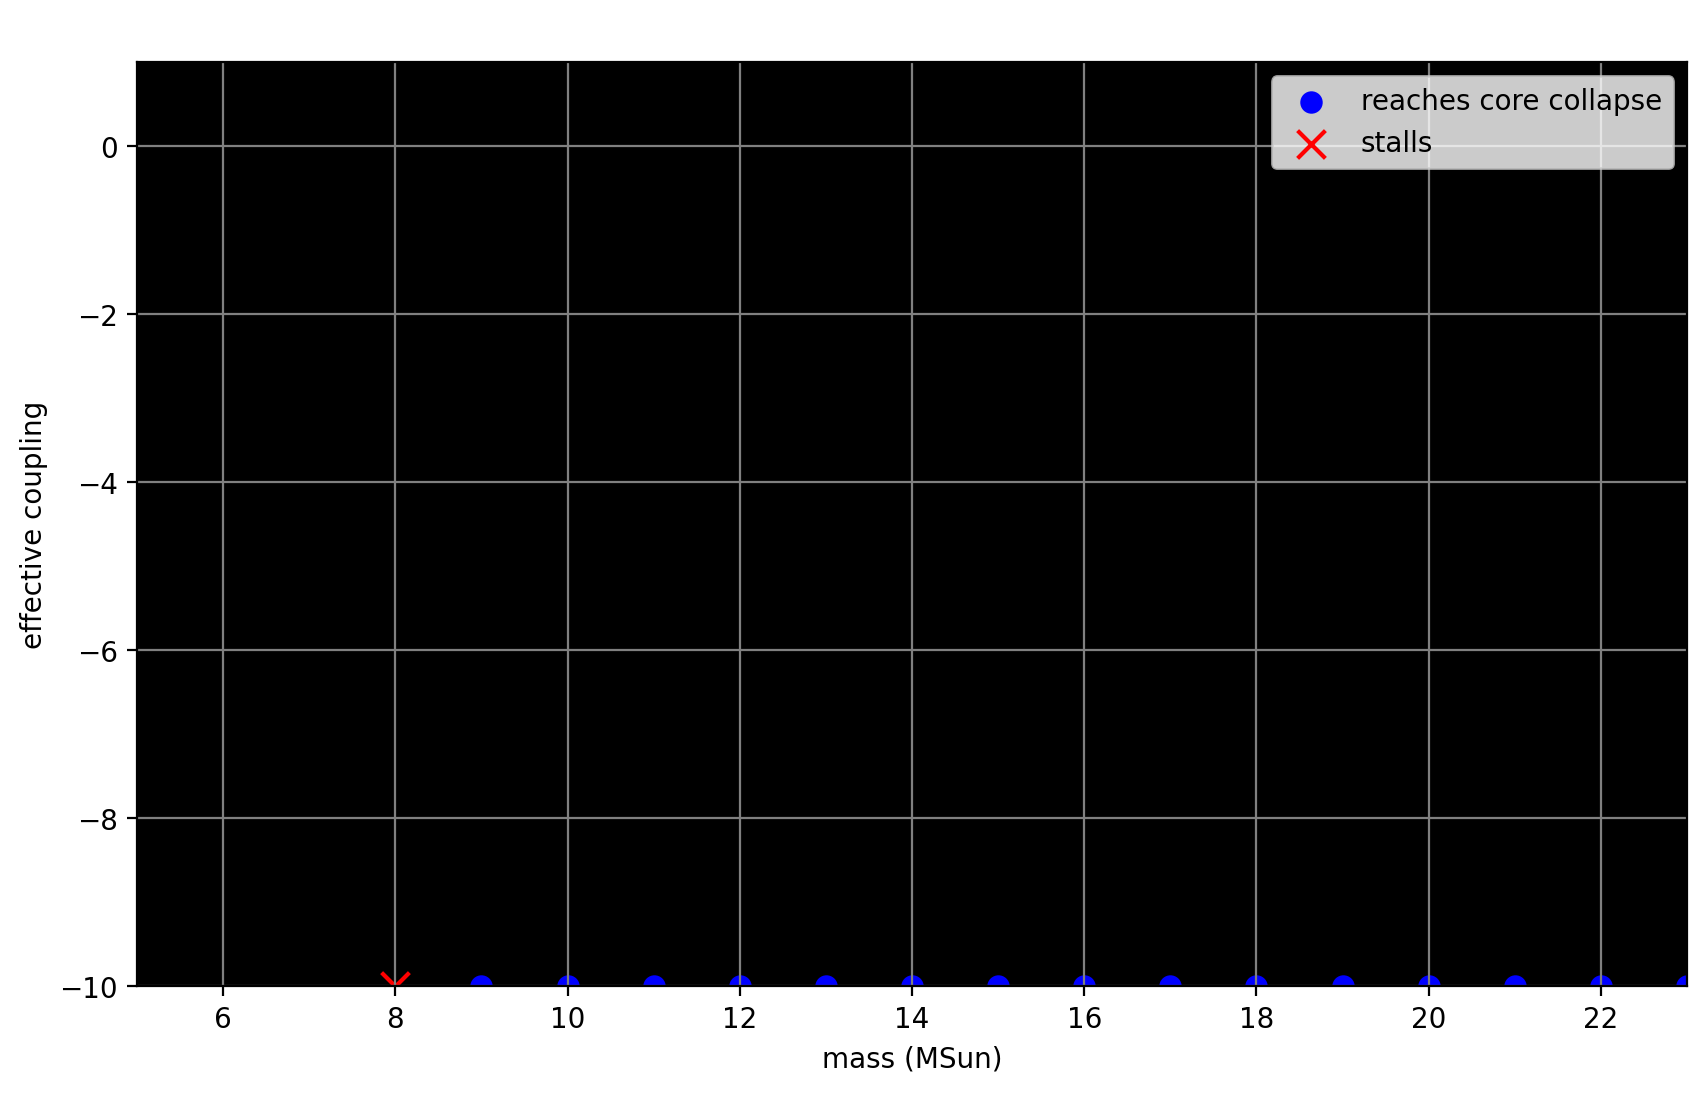

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('black')

couplings = np.zeros(len(runs))
masses = np.zeros_like(couplings)
Ts = np.zeros_like(couplings)
ages = np.zeros_like(couplings)
slices = np.zeros_like(couplings)

for (i, key) in enumerate(runs):
    run = runs[key]
    g = run['coupling'][0]
    m = run['mass (Msun)'][0]
    # if g > -8.8: continue
    couplings[i] = g
    masses[i] = m
    Ts[i] = np.array(run['core T (K)'])[-1]
    ages[i] = np.array(run['age (years)'])[-1]
    slices[i] = np.array(run['slice'])[-1]

Tcut = 1e9
slicecut = 4000
plt.grid(c='gray')
plt.scatter(masses[Ts>Tcut], couplings[Ts>Tcut], marker='o', c='blue', s=50, label='reaches core collapse')
plt.scatter(masses[Ts<Tcut], couplings[Ts<Tcut], marker='x', c='red', s=100, label='stalls')

plt.xlabel('mass (MSun)')
plt.ylabel('effective coupling')
plt.ylim(-10, 1)
plt.xlim(5, 23)
plt.legend()

plt.title('Evolutionary impact due to axion emissions', c='white')
# plt.legend()
plt.show()

Text(0, 0.5, 'Number of time steps')

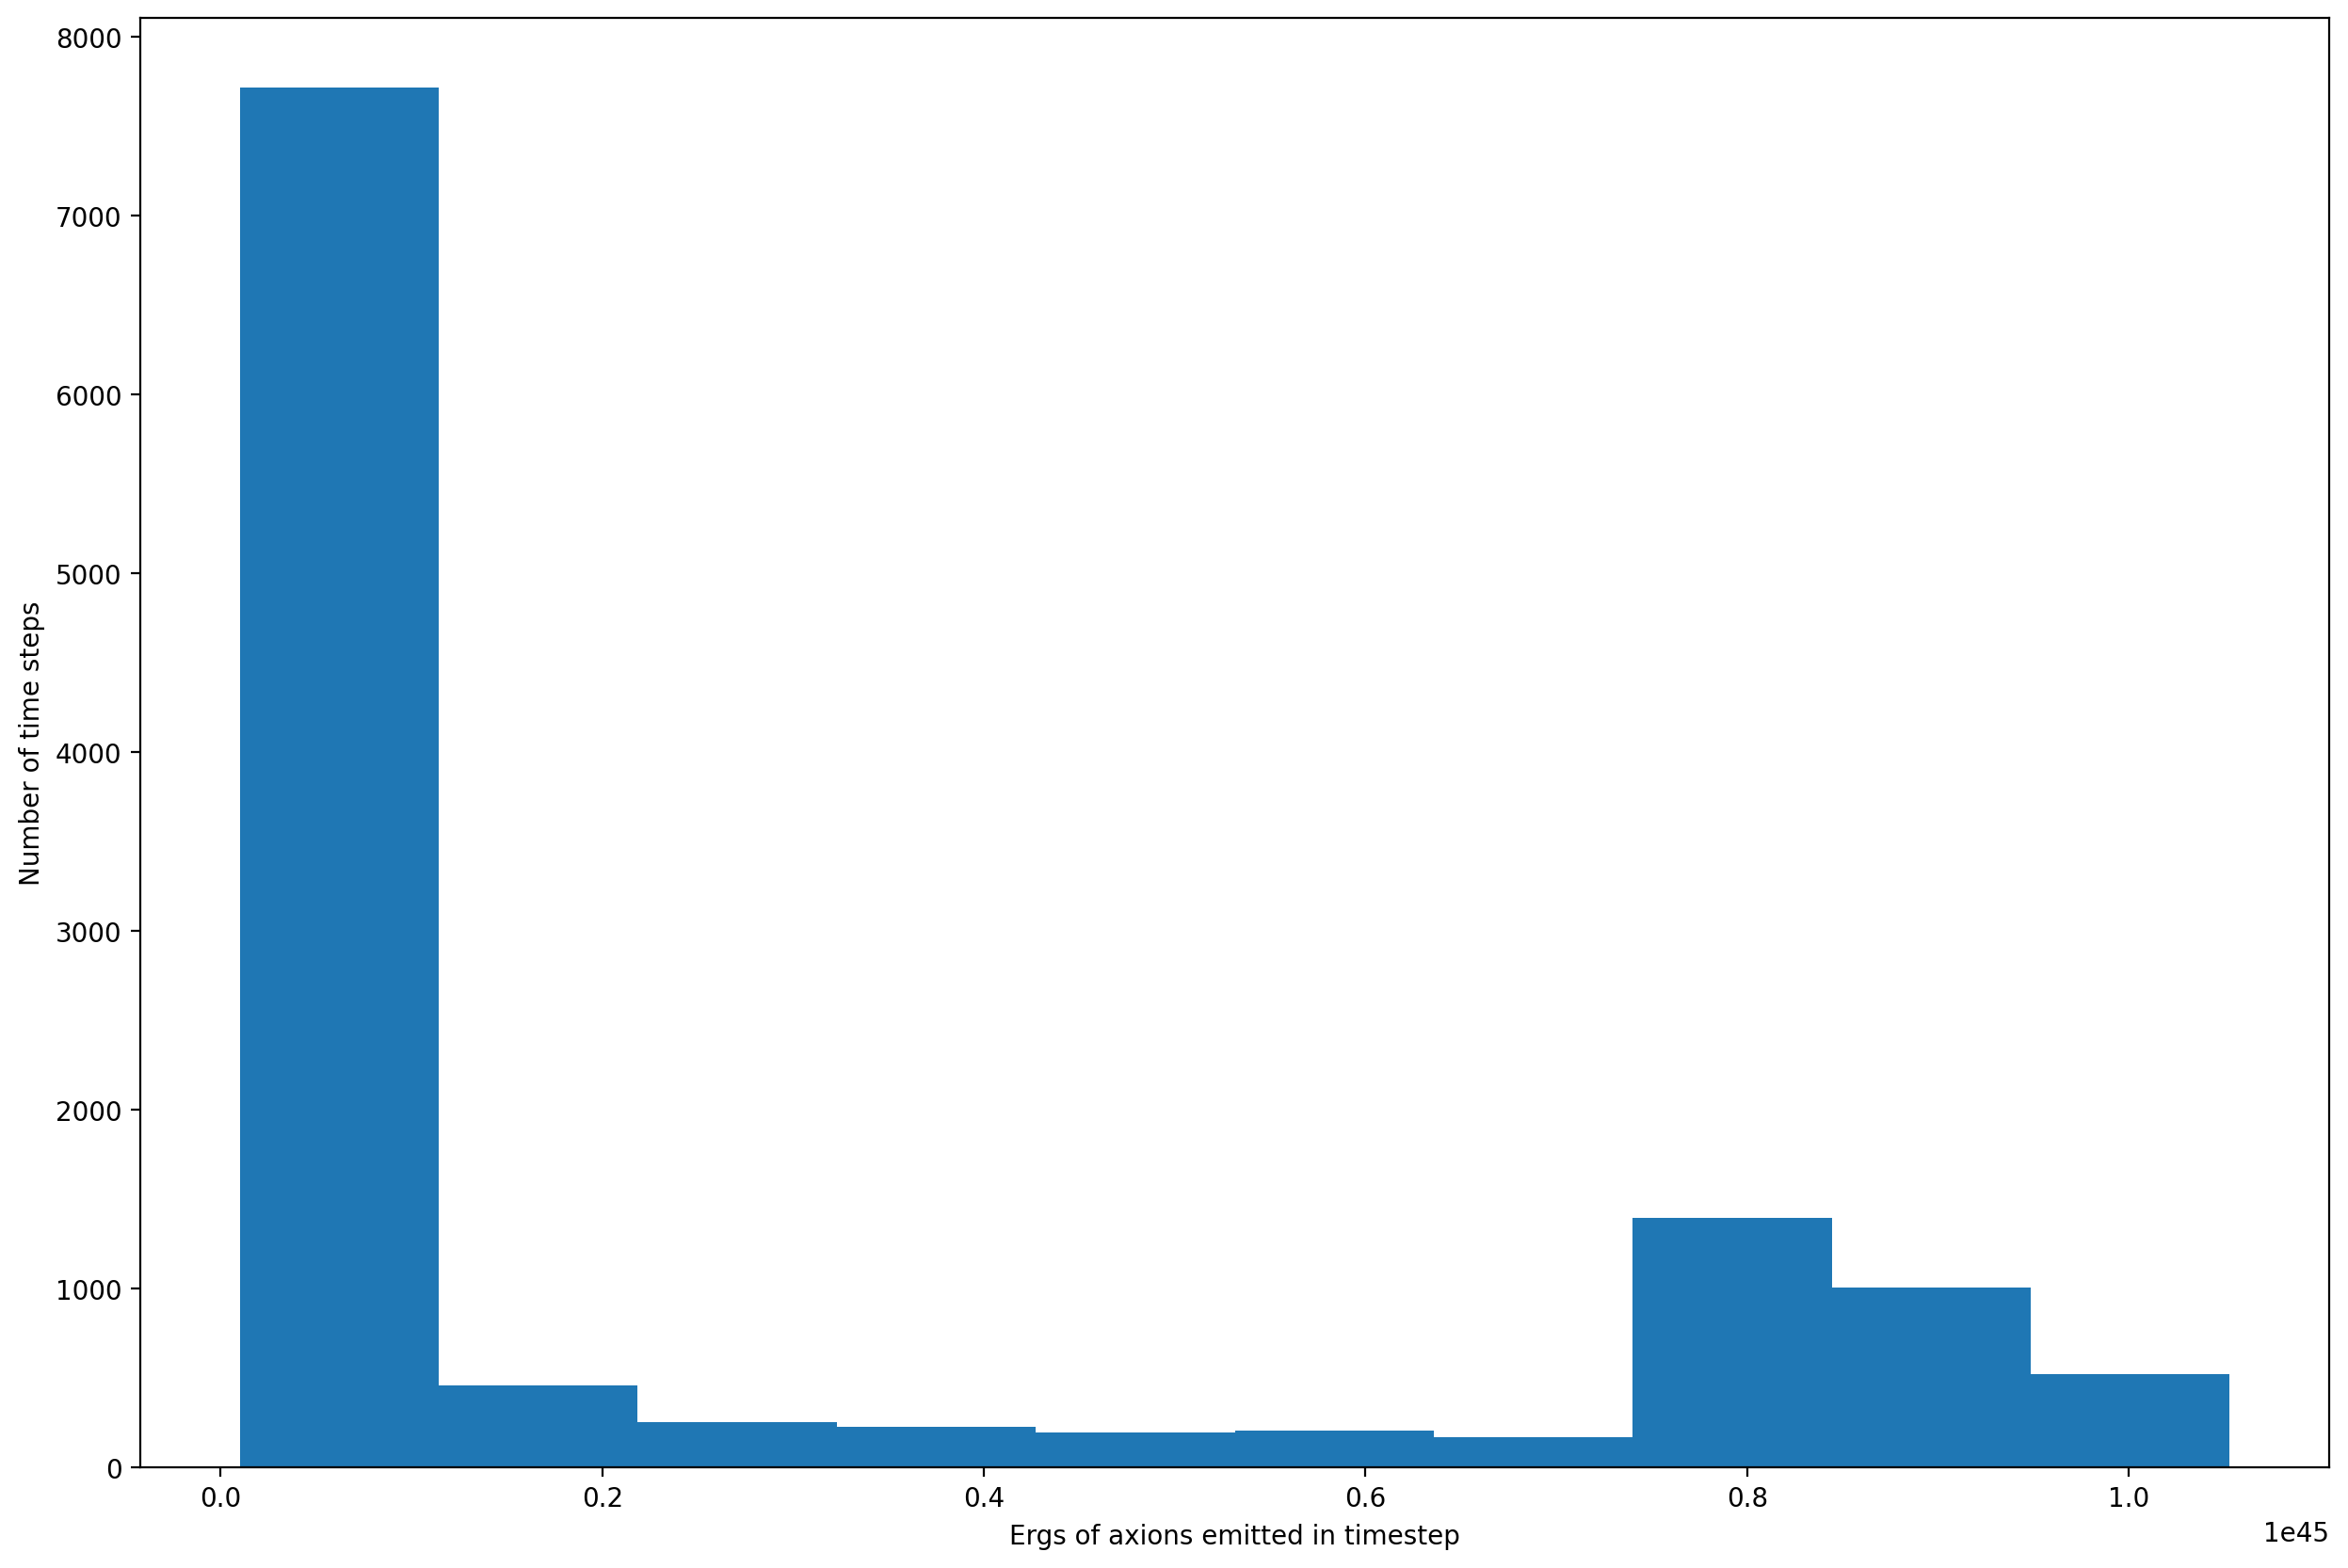

In [9]:
blah = []
for (i, key) in enumerate(runs):
    run = runs[key]
    blah.append(run['dt (years)'] * 3.154e+7 * run['surface lum_a (ergs/s)'])
blahs = np.concatenate(blah)
plt.hist(blahs[blahs>1e43], bins=10)
plt.xlabel("Ergs of axions emitted in timestep")
plt.ylabel("Number of time steps")

(0.0, 100000000.0)

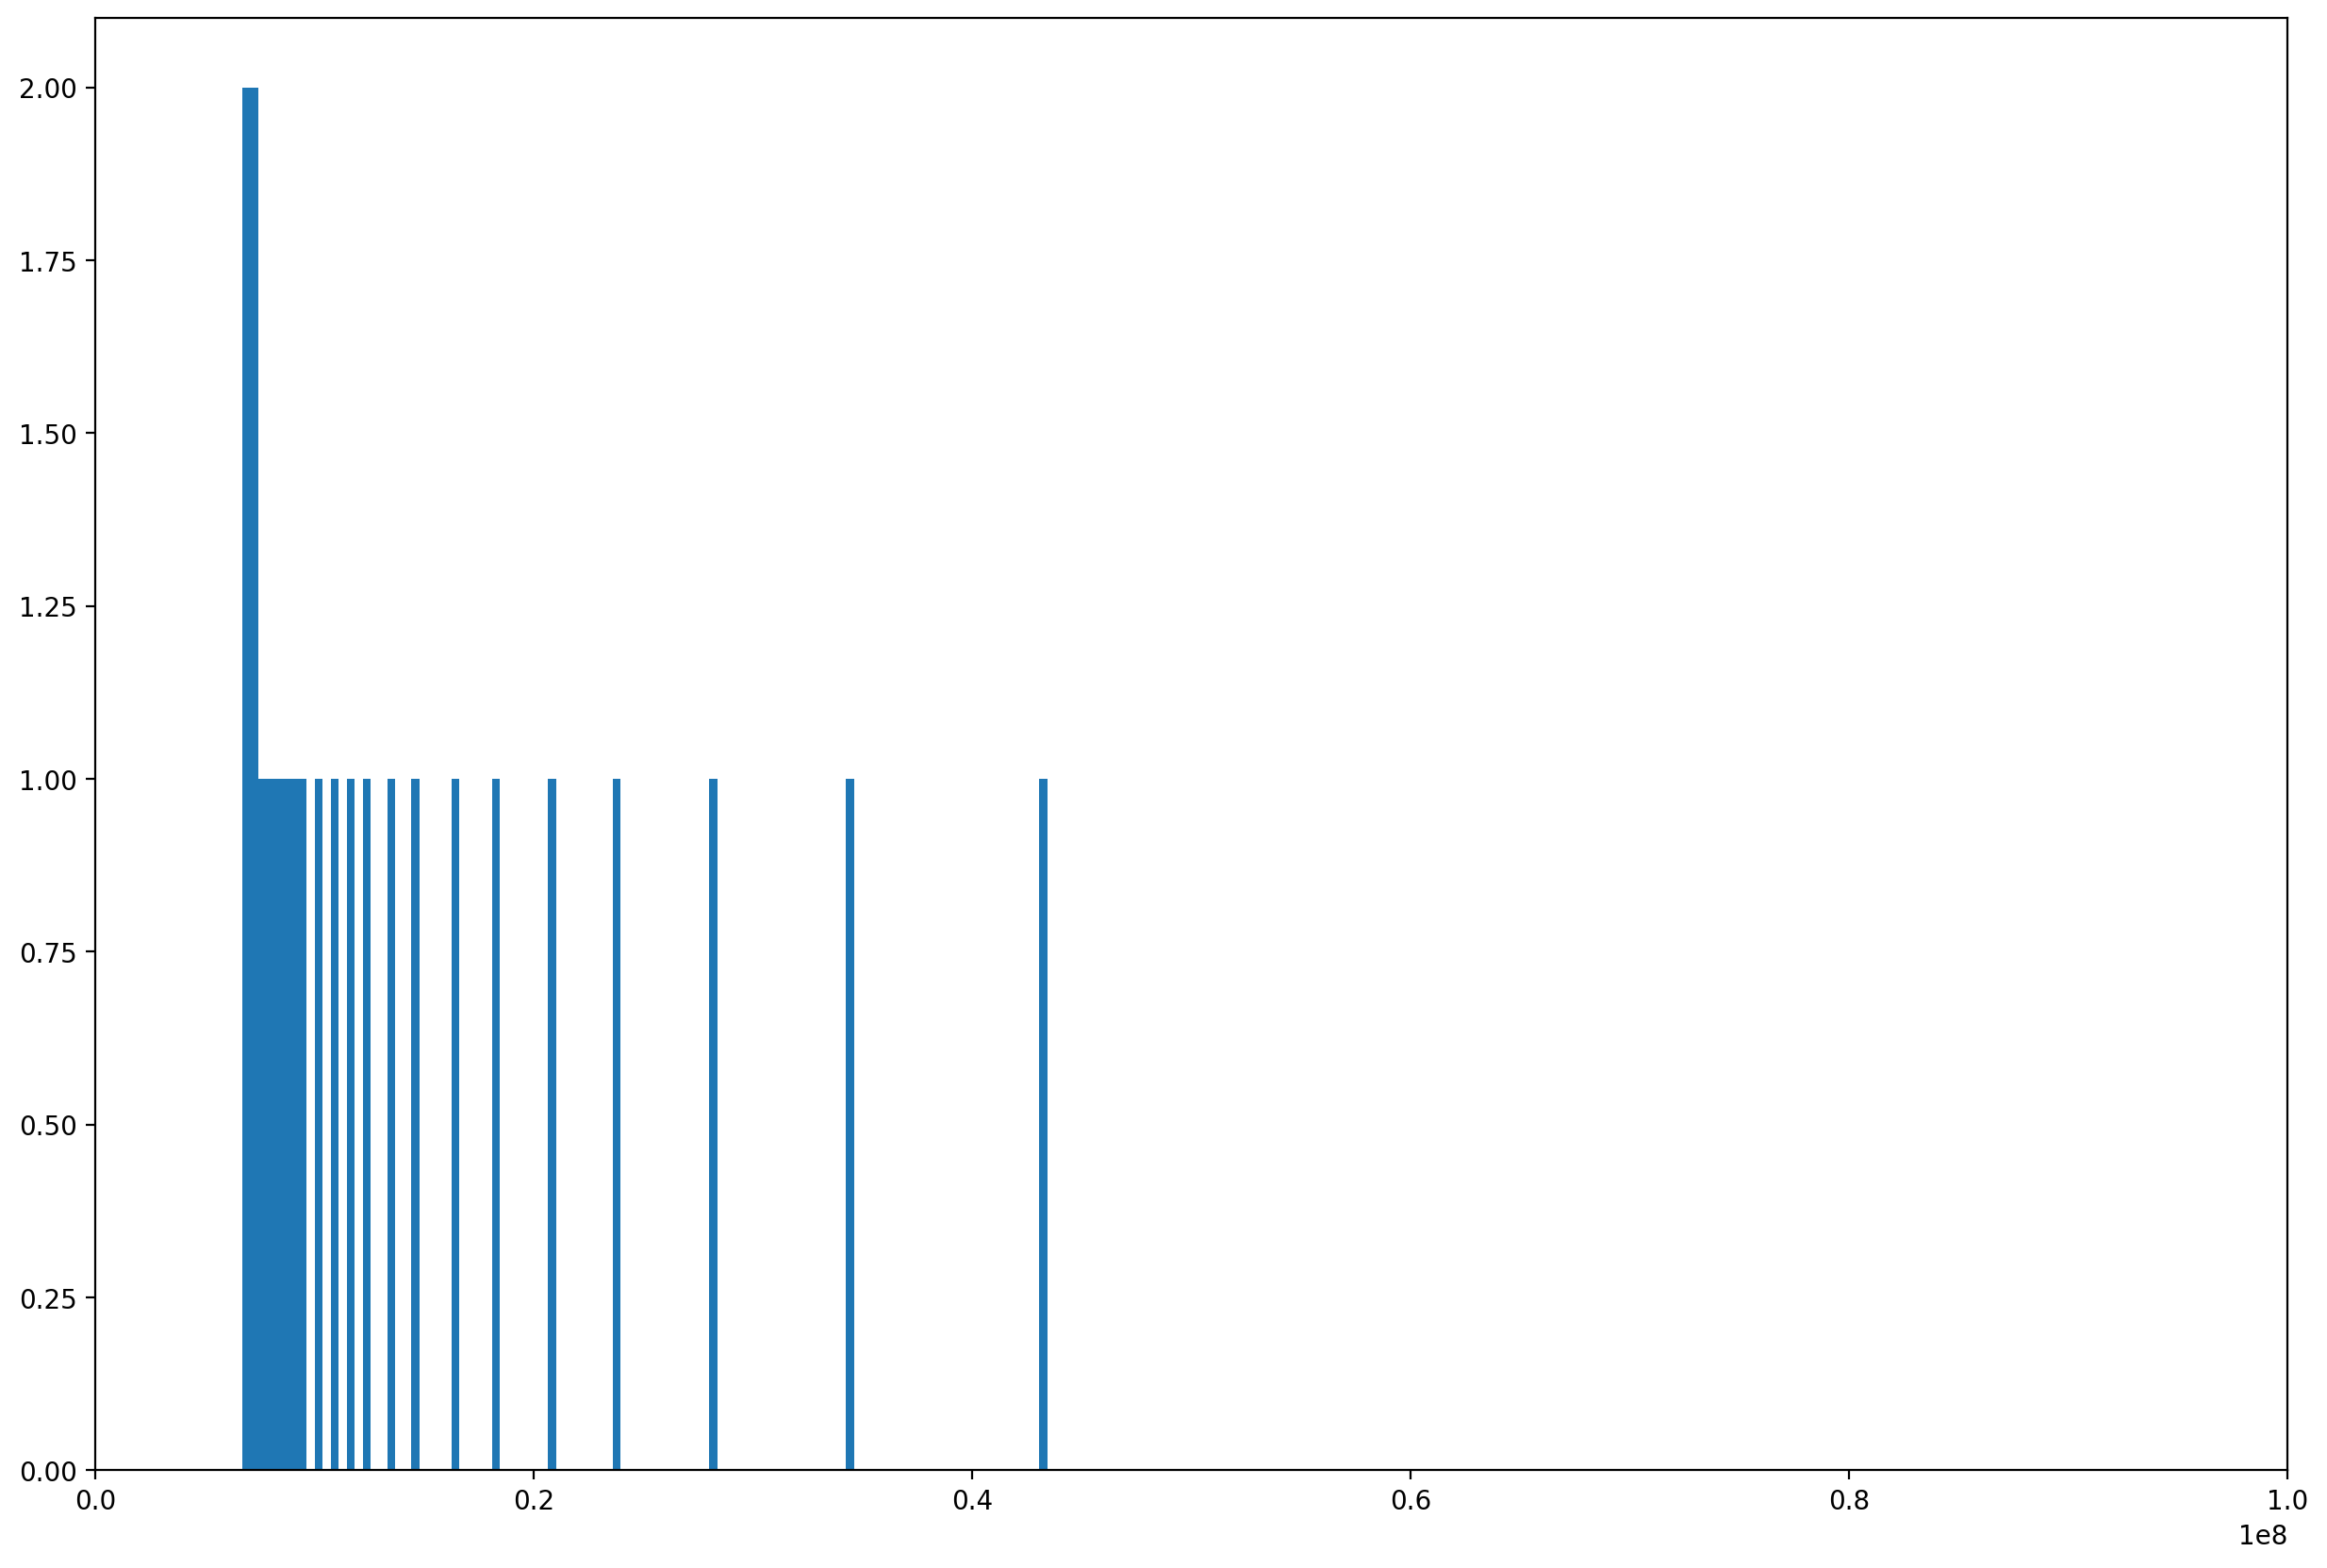

In [10]:
plt.hist(ages, bins=100)
plt.xlim(0, 1e8)

In [11]:
run

,slice,mass (Msun),coupling,age (years),time to core O depletion (years),dt (years),core T (K),effective T (K),surface lum_gamma (ergs/s),surface lum_neu (ergs/s),surface lum_a (ergs/s),surface num_a (/s),cumulative e_gamma (ergs),cumulative e_neu (ergs),cumulative e_a (ergs),avg X_c12,avg X_o16,avg X_ne20,avg X_na23
0,1.0,30.0,-10.0,1.000000e-05,6.693217e+06,0.000010,4.605651e+05,4143.892234,1.713402e+15,0.000000e+00,0.000000e+00,0.000000e+00,5.403383e+17,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
1,100.0,30.0,-10.0,8.356484e+02,6.692381e+06,55.785300,8.455055e+05,4456.362643,3.541473e+19,0.000000e+00,0.000000e+00,0.000000e+00,6.230320e+28,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
2,103.0,30.0,-10.0,1.000000e+03,6.692217e+06,17.078390,9.284997e+05,4482.891990,1.367026e+20,0.000000e+00,0.000000e+00,0.000000e+00,1.359291e+29,0.000000e+00,0.000000e+00,0.002516,0.006103,0.001326,0.000000e+00
3,104.0,30.0,-10.0,1.020494e+03,6.692196e+06,20.494068,9.376781e+05,4126.780371,2.810990e+19,0.000000e+00,0.000000e+00,0.000000e+00,1.540965e+29,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,1.000000e-99
4,105.0,30.0,-10.0,1.042013e+03,6.692175e+06,21.518771,9.480370e+05,4123.924544,3.266052e+19,0.000000e+00,0.000000e+00,0.000000e+00,1.762605e+29,0.000000e+00,0.000000e+00,0.002489,0.006083,0.001232,9.197579e-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,1917.0,30.0,-10.0,6.693217e+06,7.170355e-04,0.000158,2.543761e+09,3142.523095,4.983051e+44,7.313101e+44,4.499324e+37,6.382400e+43,1.629346e+53,4.091322e+51,9.983730e+45,0.018231,0.229180,0.089663,4.254388e-03
1817,1918.0,30.0,-10.0,6.693217e+06,5.506743e-04,0.000166,2.552555e+09,3142.526305,5.334625e+44,7.294369e+44,4.496621e+37,6.378564e+43,1.629374e+53,4.095149e+51,9.983965e+45,0.018185,0.229115,0.089702,4.251838e-03
1818,1919.0,30.0,-10.0,6.693217e+06,3.759963e-04,0.000175,2.560620e+09,3142.531444,5.651091e+44,7.270702e+44,4.486776e+37,6.364599e+43,1.629405e+53,4.099154e+51,9.984213e+45,0.018138,0.229041,0.089741,4.248901e-03
1819,1920.0,30.0,-10.0,6.693217e+06,1.925835e-04,0.000183,2.568229e+09,3142.538237,5.882867e+44,7.247807e+44,4.469865e+37,6.340610e+43,1.629439e+53,4.103346e+51,9.984471e+45,0.018089,0.228961,0.089782,4.245562e-03


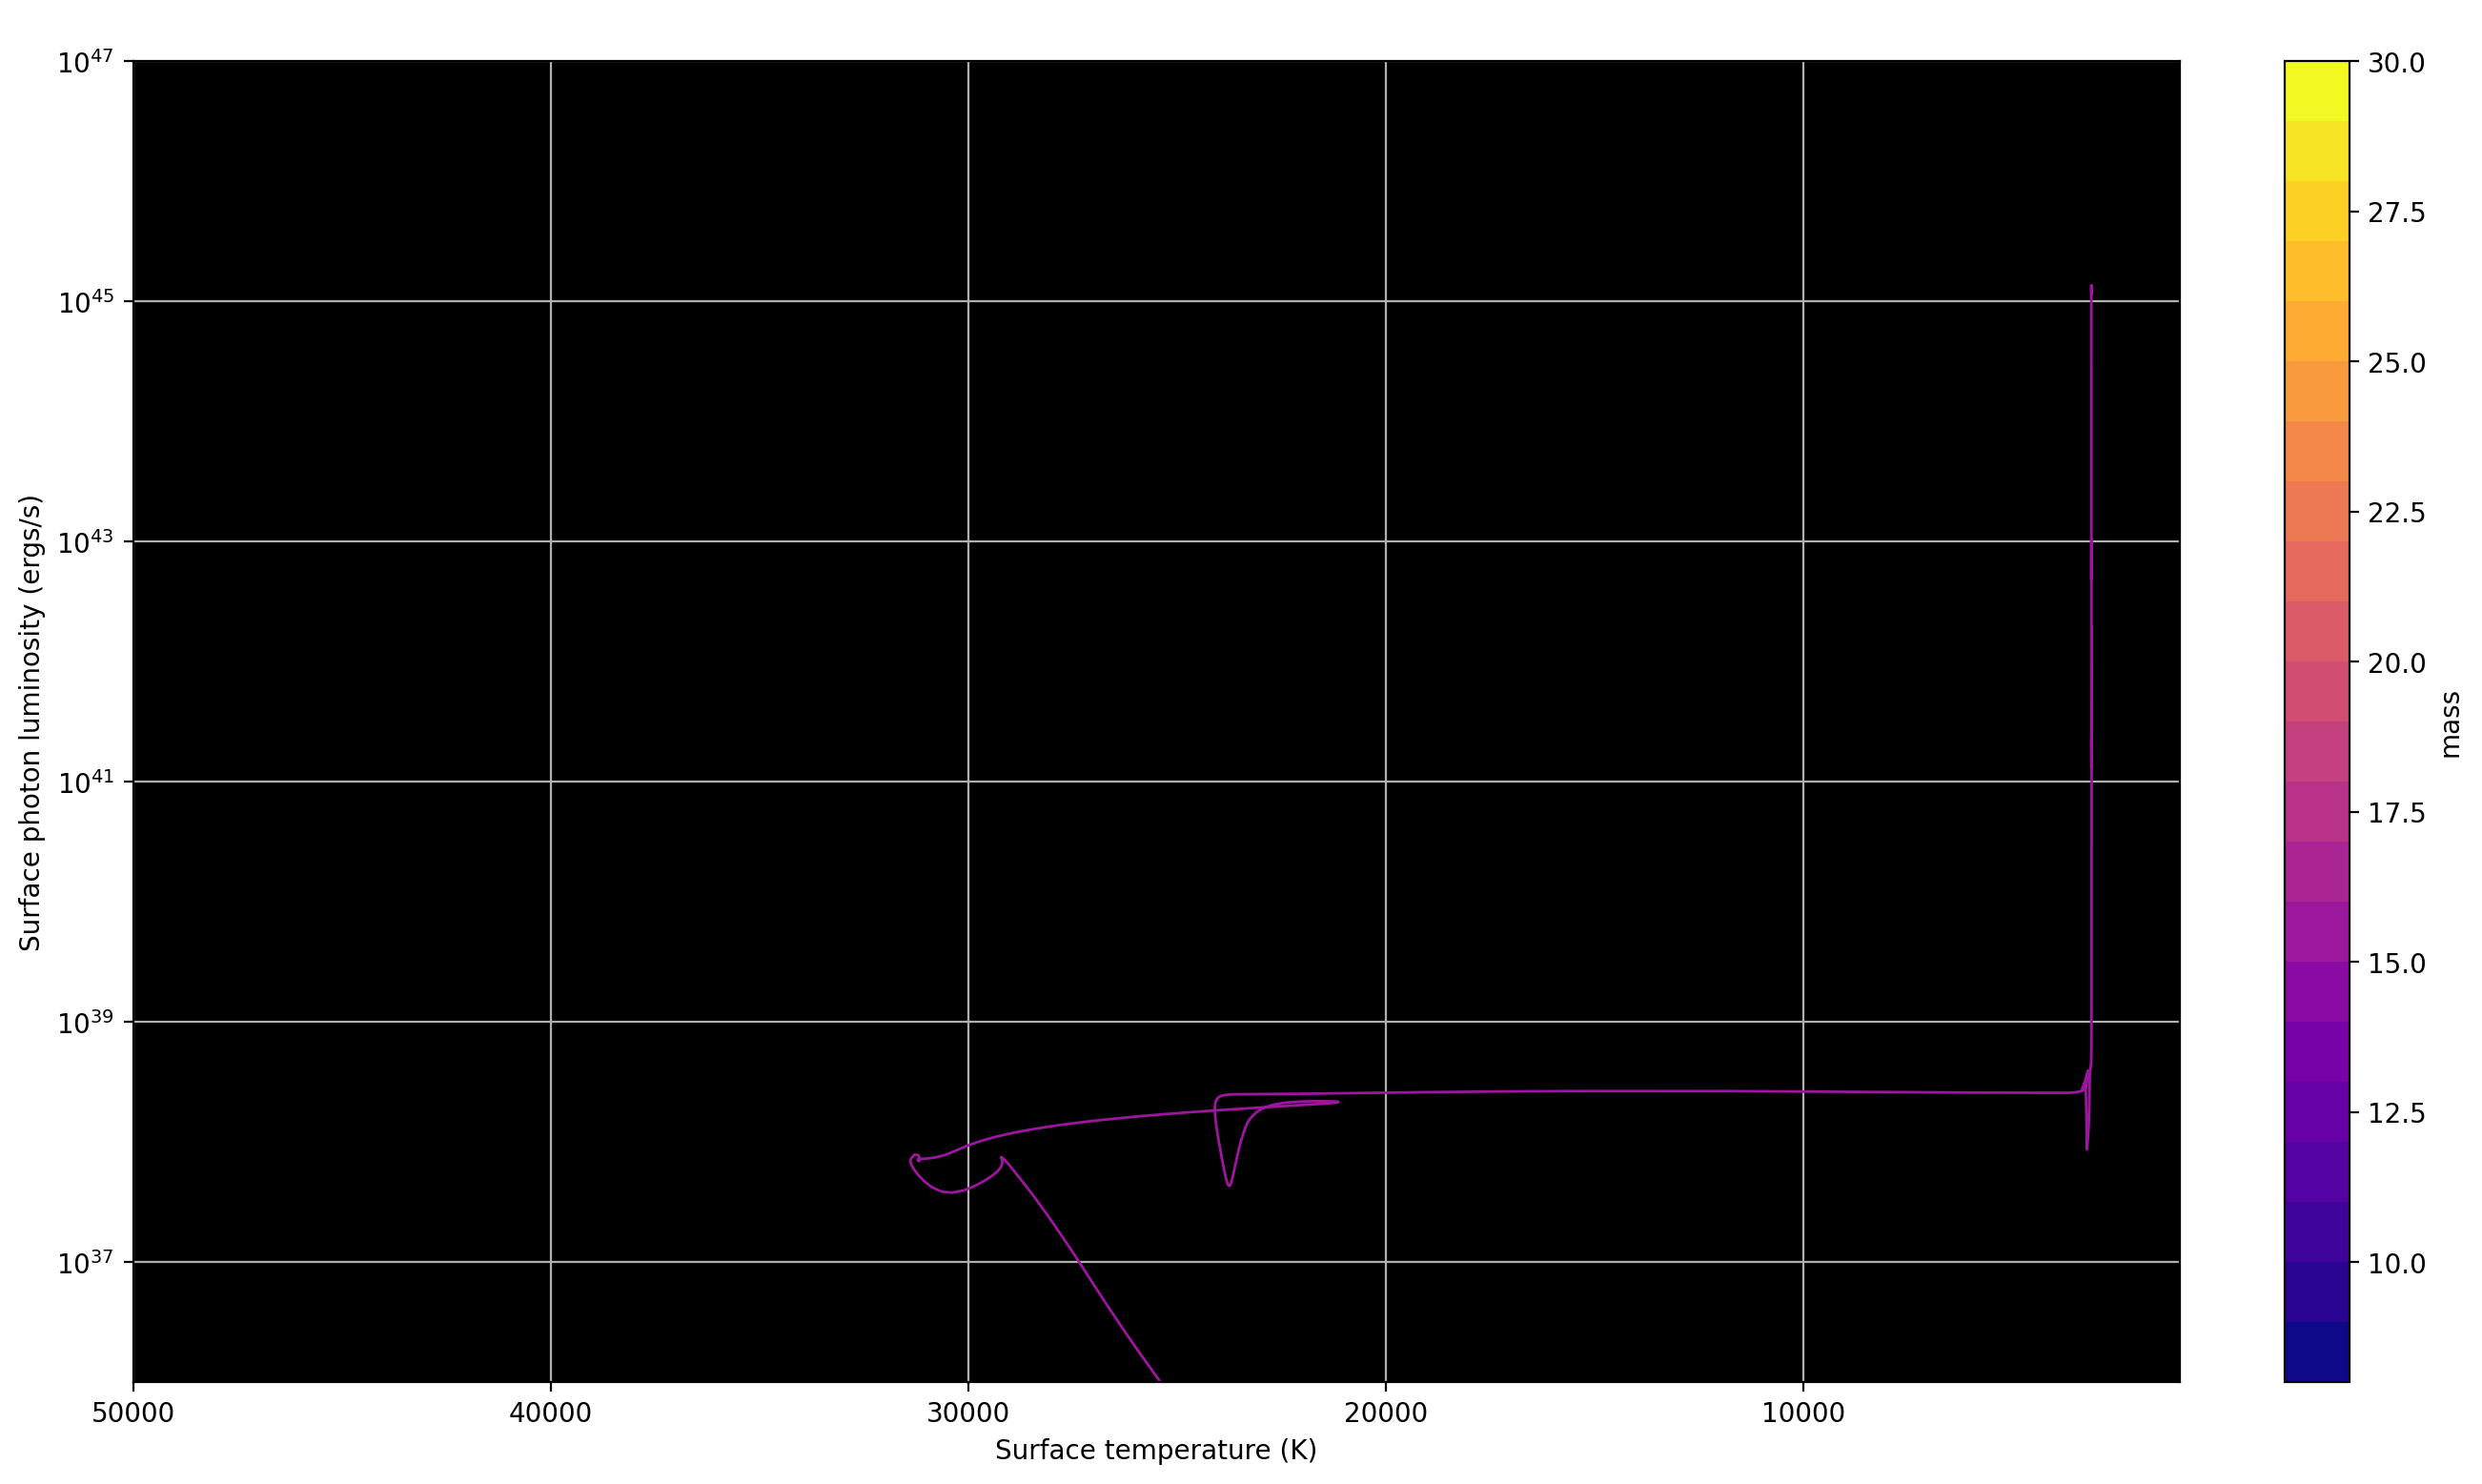

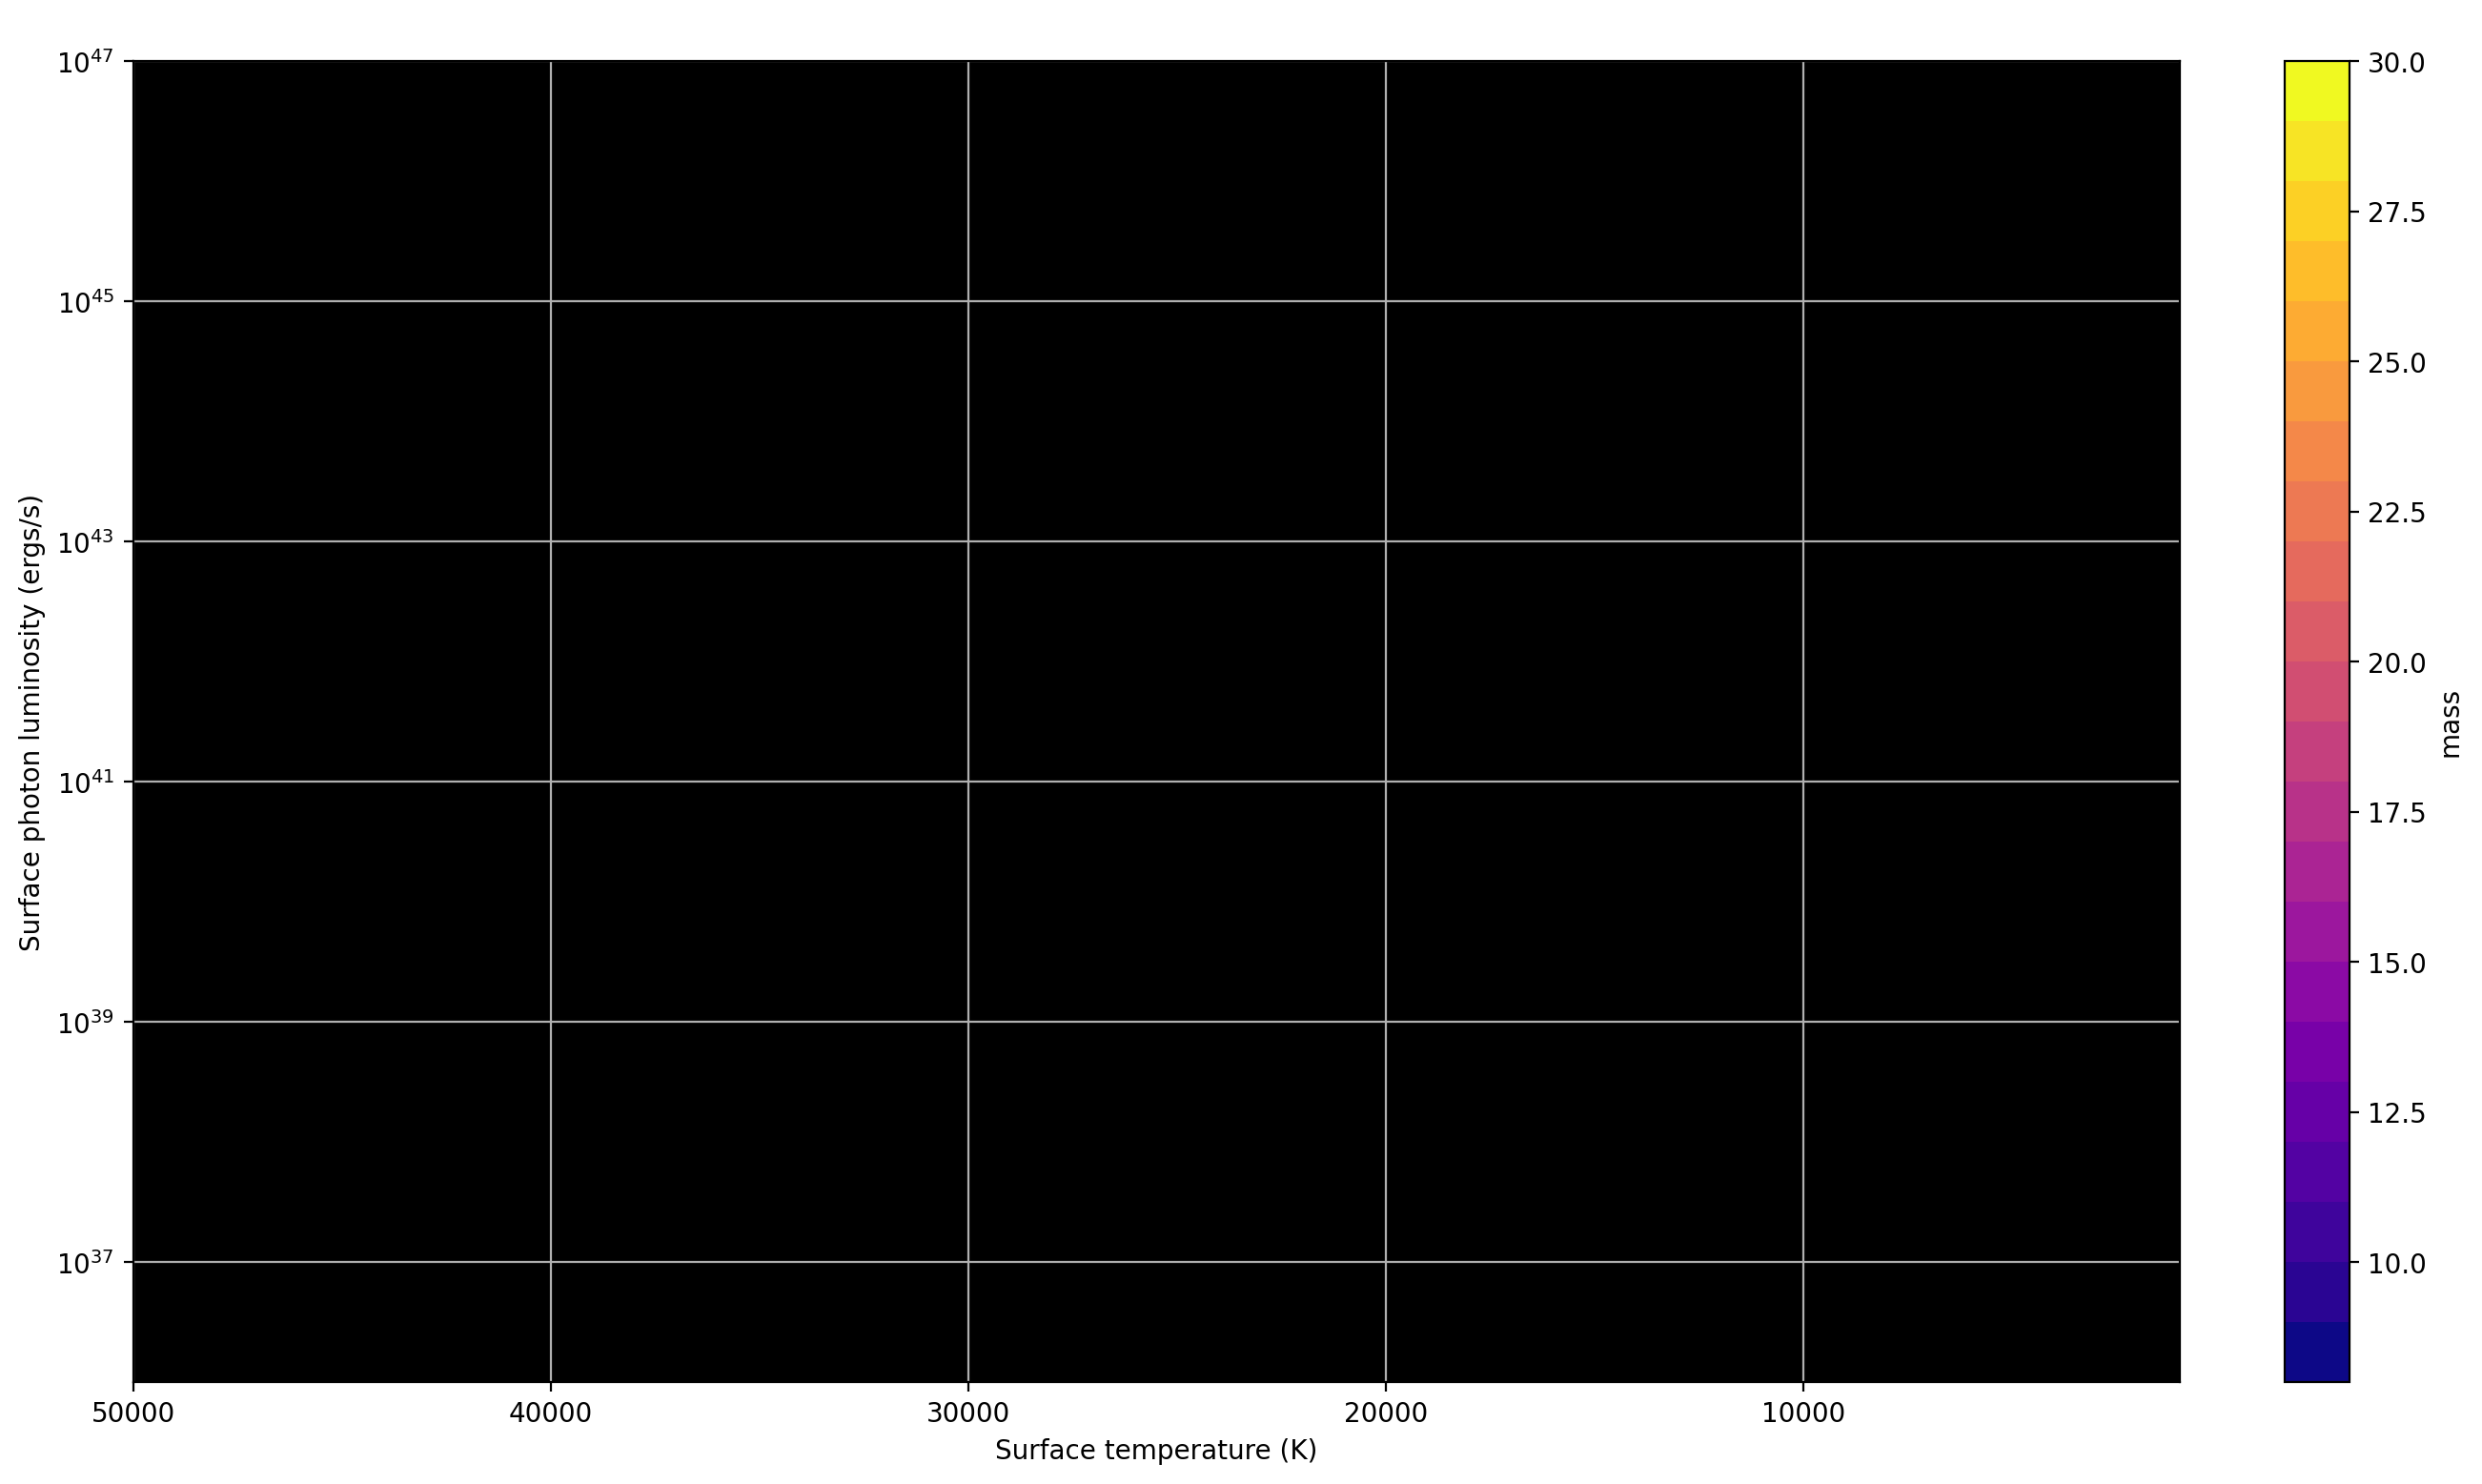

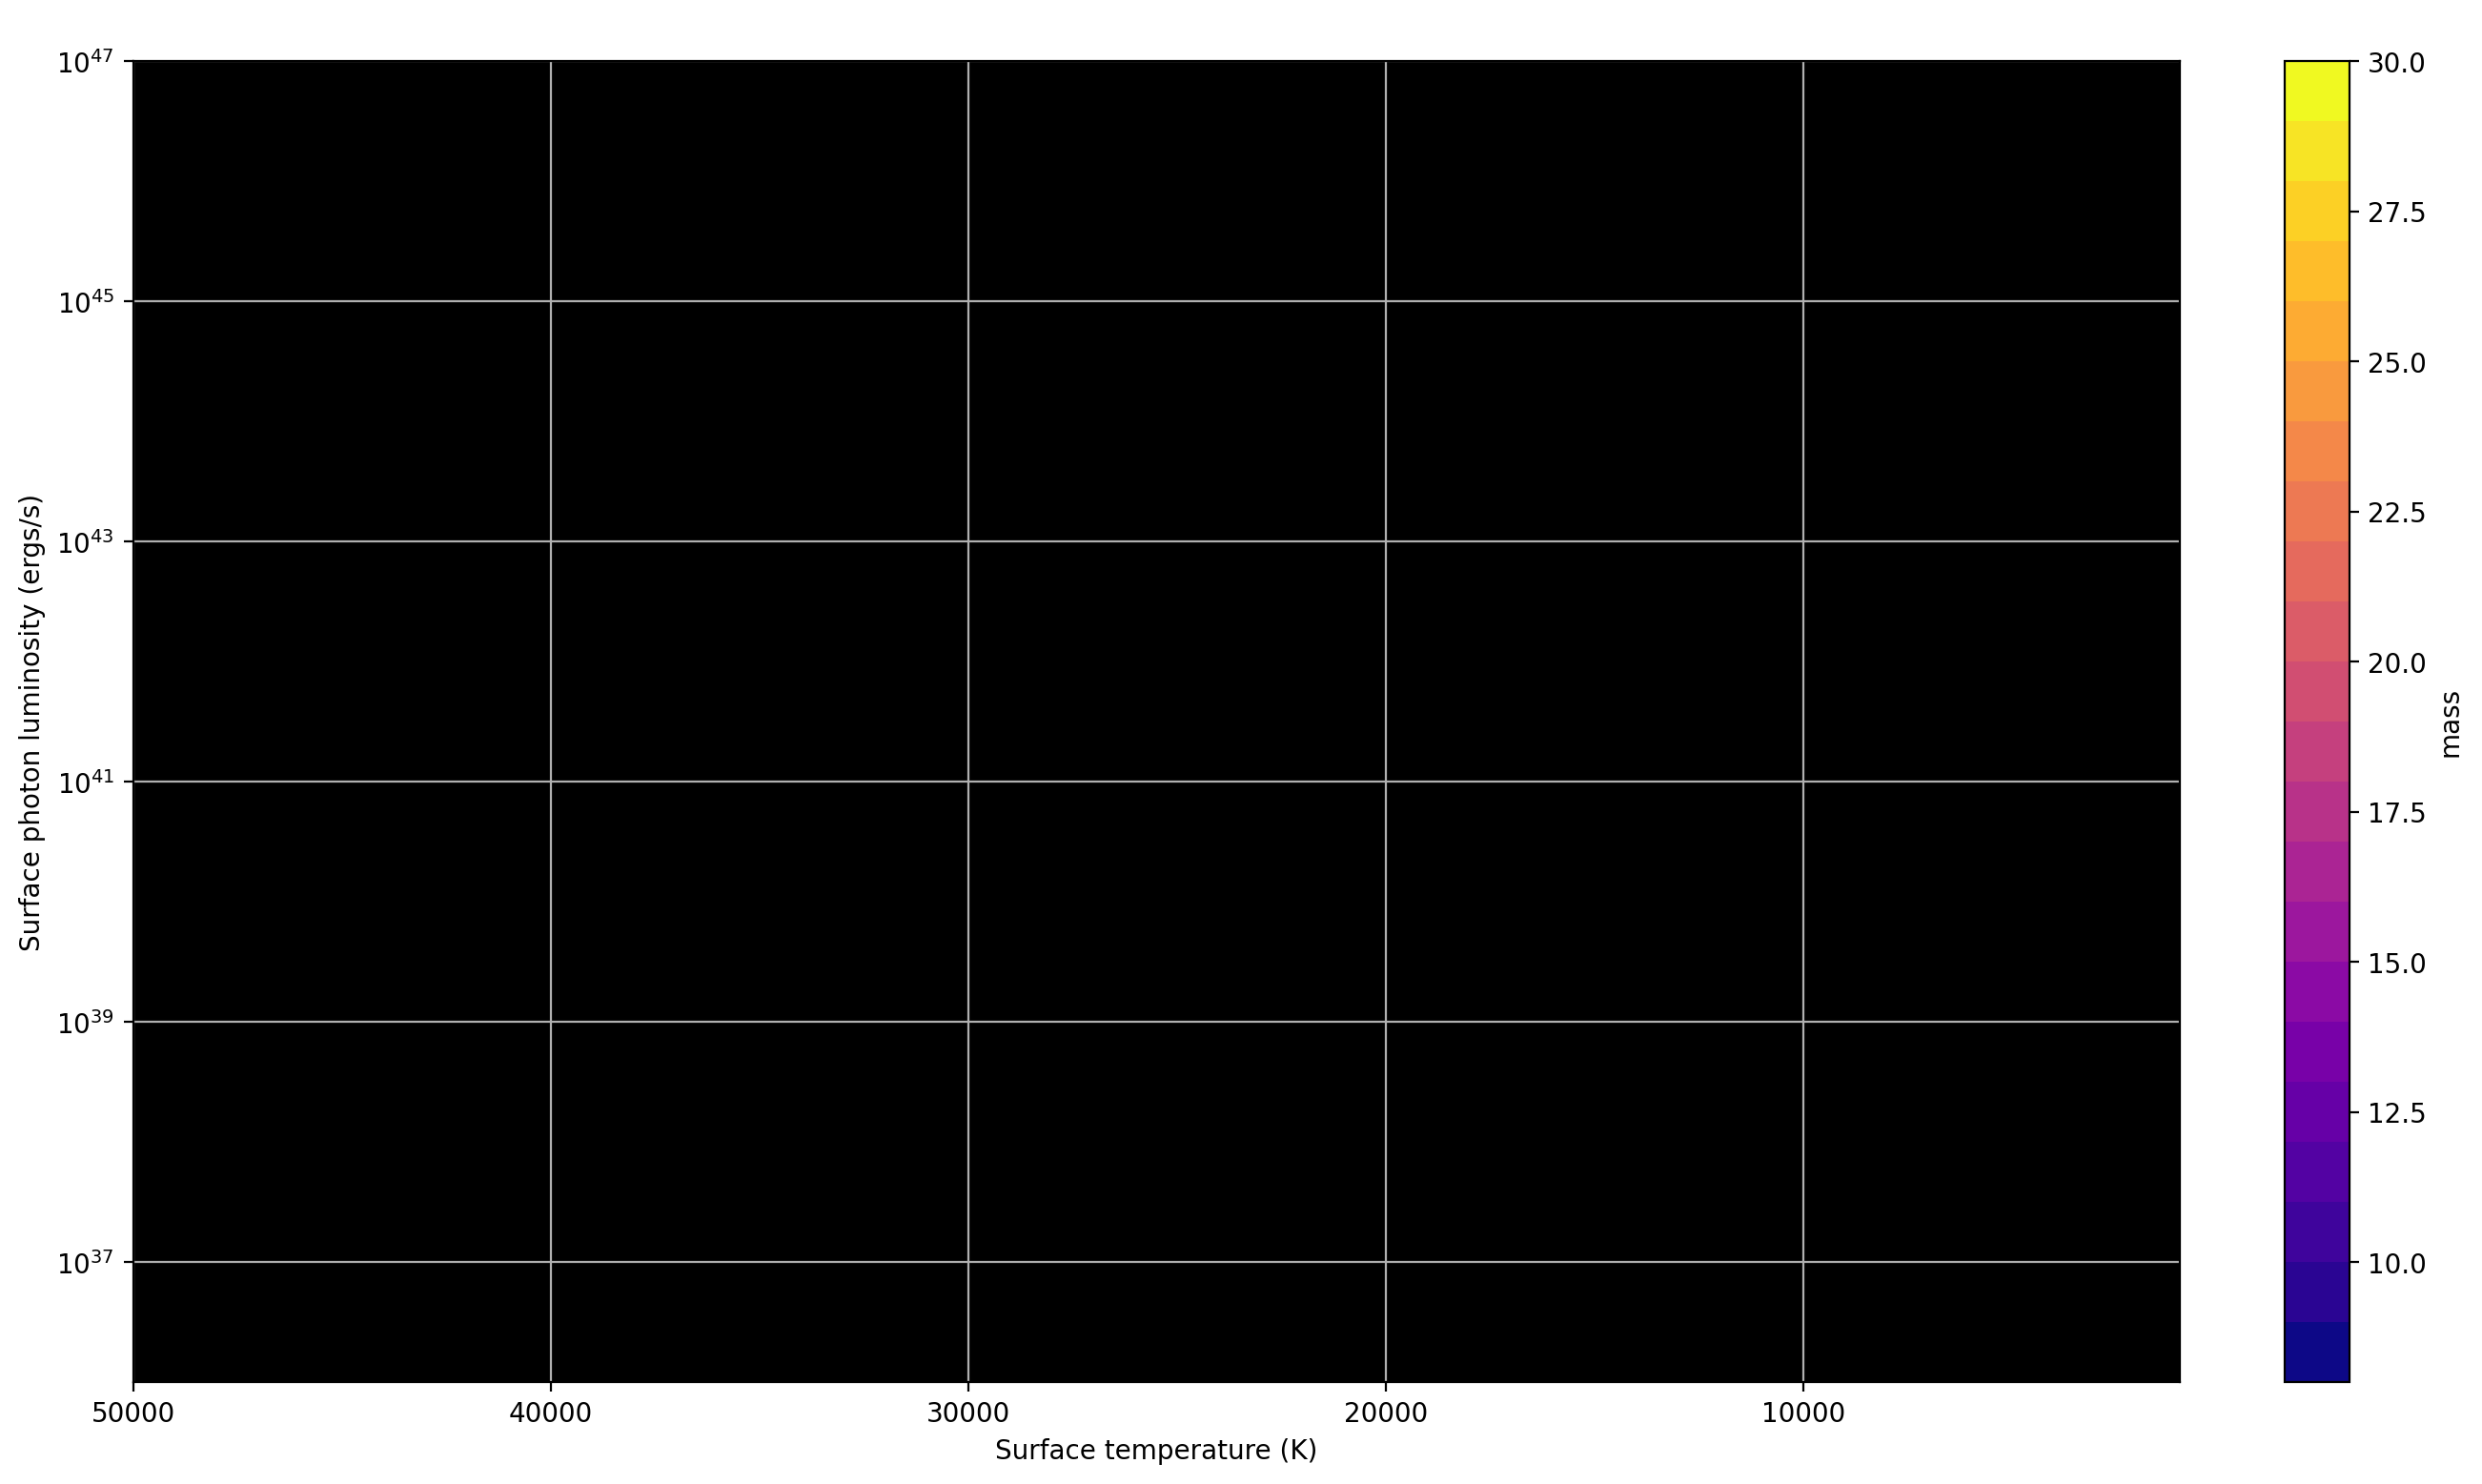

In [12]:
for G in [-10, -9, -8]:
    fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                            gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                           )
    main_ax.set_facecolor('black')
    fig.colorbar(colormap_m, label='mass', cax=color_ax)
    ###
    
    plt.sca(main_ax)
    main_ax.set_yscale('log')
    # main_ax.set_xscale('log')
    # plt.ylim(1e33, 1e36)
    
    M = [15]
    
    for key in reversed(runs):
        run = runs[key]
        mass = run['mass (Msun)'][0]
        g = run['coupling'][0]
        if g != G or mass not in M: continue
        x = np.array(run['effective T (K)'])
        y = np.array(run['surface lum_gamma (ergs/s)'])
        Tend = np.array(run['core T (K)'])[-1]
        plt.plot(x, y, c=colormap_m.to_rgba(mass), lw=1)
        # plt.plot(x, y, c=('red' if Tend < Tcut else 'blue'))
    
    plt.xlabel('Surface temperature (K)')
    plt.ylabel('Surface photon luminosity (ergs/s)')
    plt.xlim(5e4, 1e3)
    plt.ylim(1e36, 1e47)
    plt.grid()
    
    plt.title(f'Hertzsprung-Russel, log $g = {G}$', c='white')
    plt.savefig('evol/track_' + str(G) + '.png')
    # plt.legend()
    plt.show()

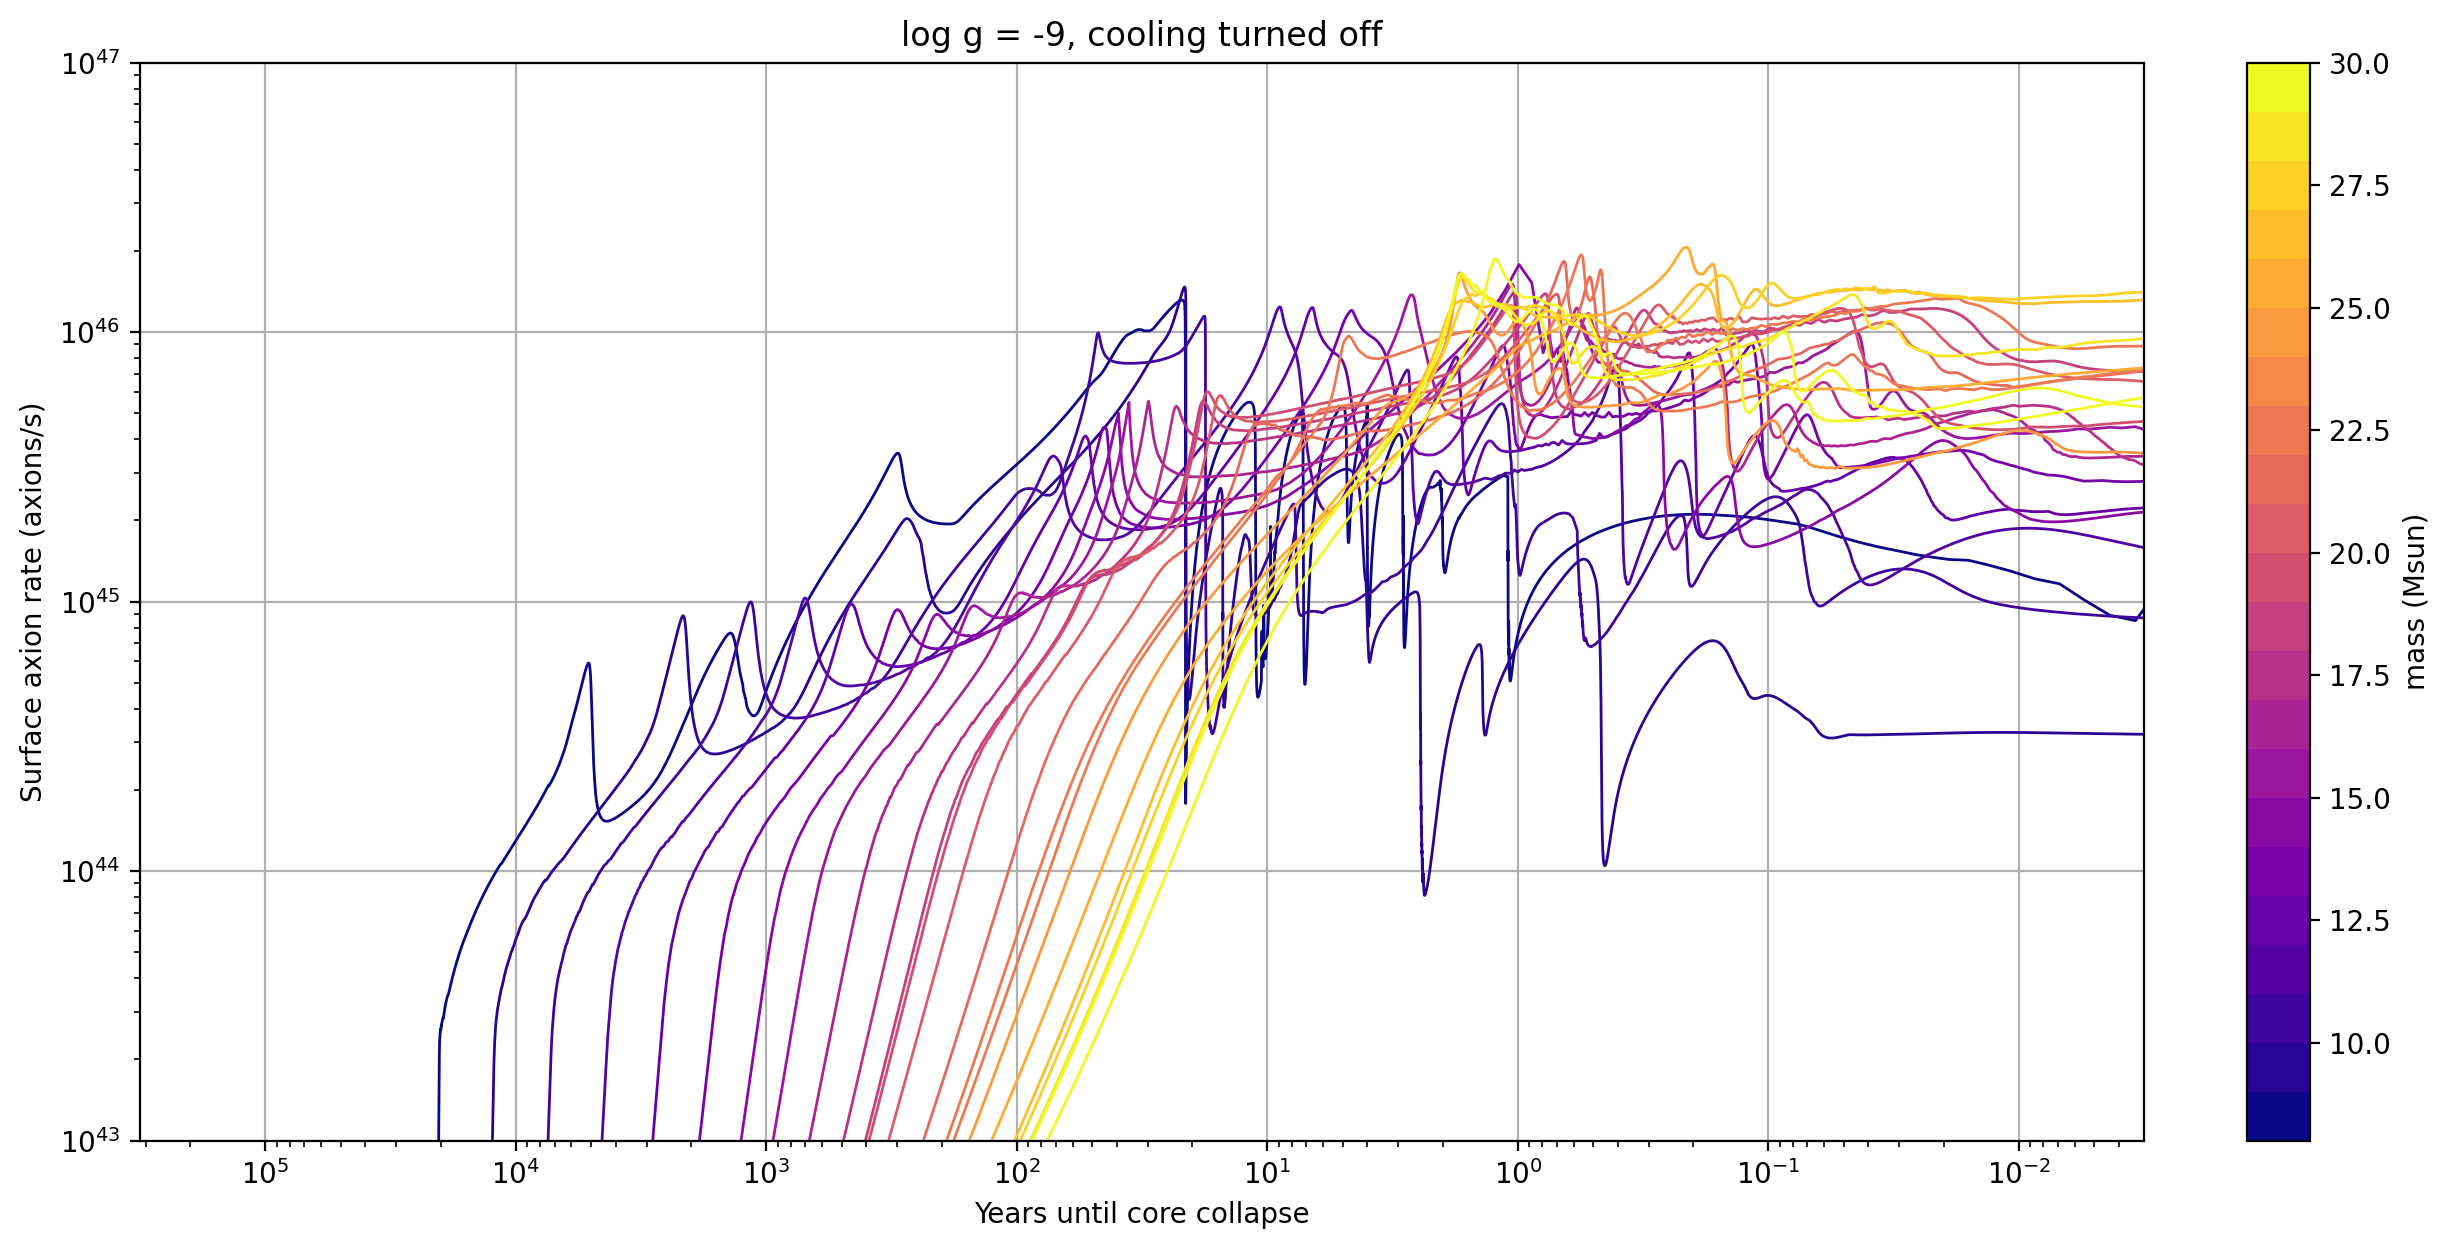

In [13]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(14, 7), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
# main_ax.set_facecolor('black')
fig.colorbar(colormap_m, label='mass (Msun)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]
secyear = 365*24*60*60

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    x = np.array(run['time to core O depletion (years)'])
    # print(key)
    y = np.array(run['surface num_a (/s)'])*100
    plt.plot(x, y, lw=1, label=key, color=colormap_m.to_rgba(mass))
    # print(m, np.sum(y[x<3.154e+10][1:] * np.diff(y[x<3.154e+10])))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# key = f'm11.0_g-10.00_0'
# run = pd.read_csv(f'../wd/csv/{key}/index.csv')
# x = np.array(run['time to core O depletion (years)']) * 3.154e+7
# y = np.array(run['surface num_a (/s)'])
# i = np.argmax(y)
# x1 = x - x[i]
# plt.plot(x1, y, lw=1, label=key, color='white')
# print('wd', np.sum(y[x1<3.154e+10][1:] * np.diff(y[x1<3.154e+10])))


plt.ylim(1e43, 1e47)
plt.xlim(1e13/secyear, 1e5/secyear)
plt.xlabel('Years until core collapse')
plt.ylabel('Surface axion rate (axions/s)')
plt.grid()

plt.title('log g = -9, cooling turned off', c='black')
# plt.legend()
plt.savefig('rates.png')
plt.show()

/tmp/ipykernel_134731/743641802.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


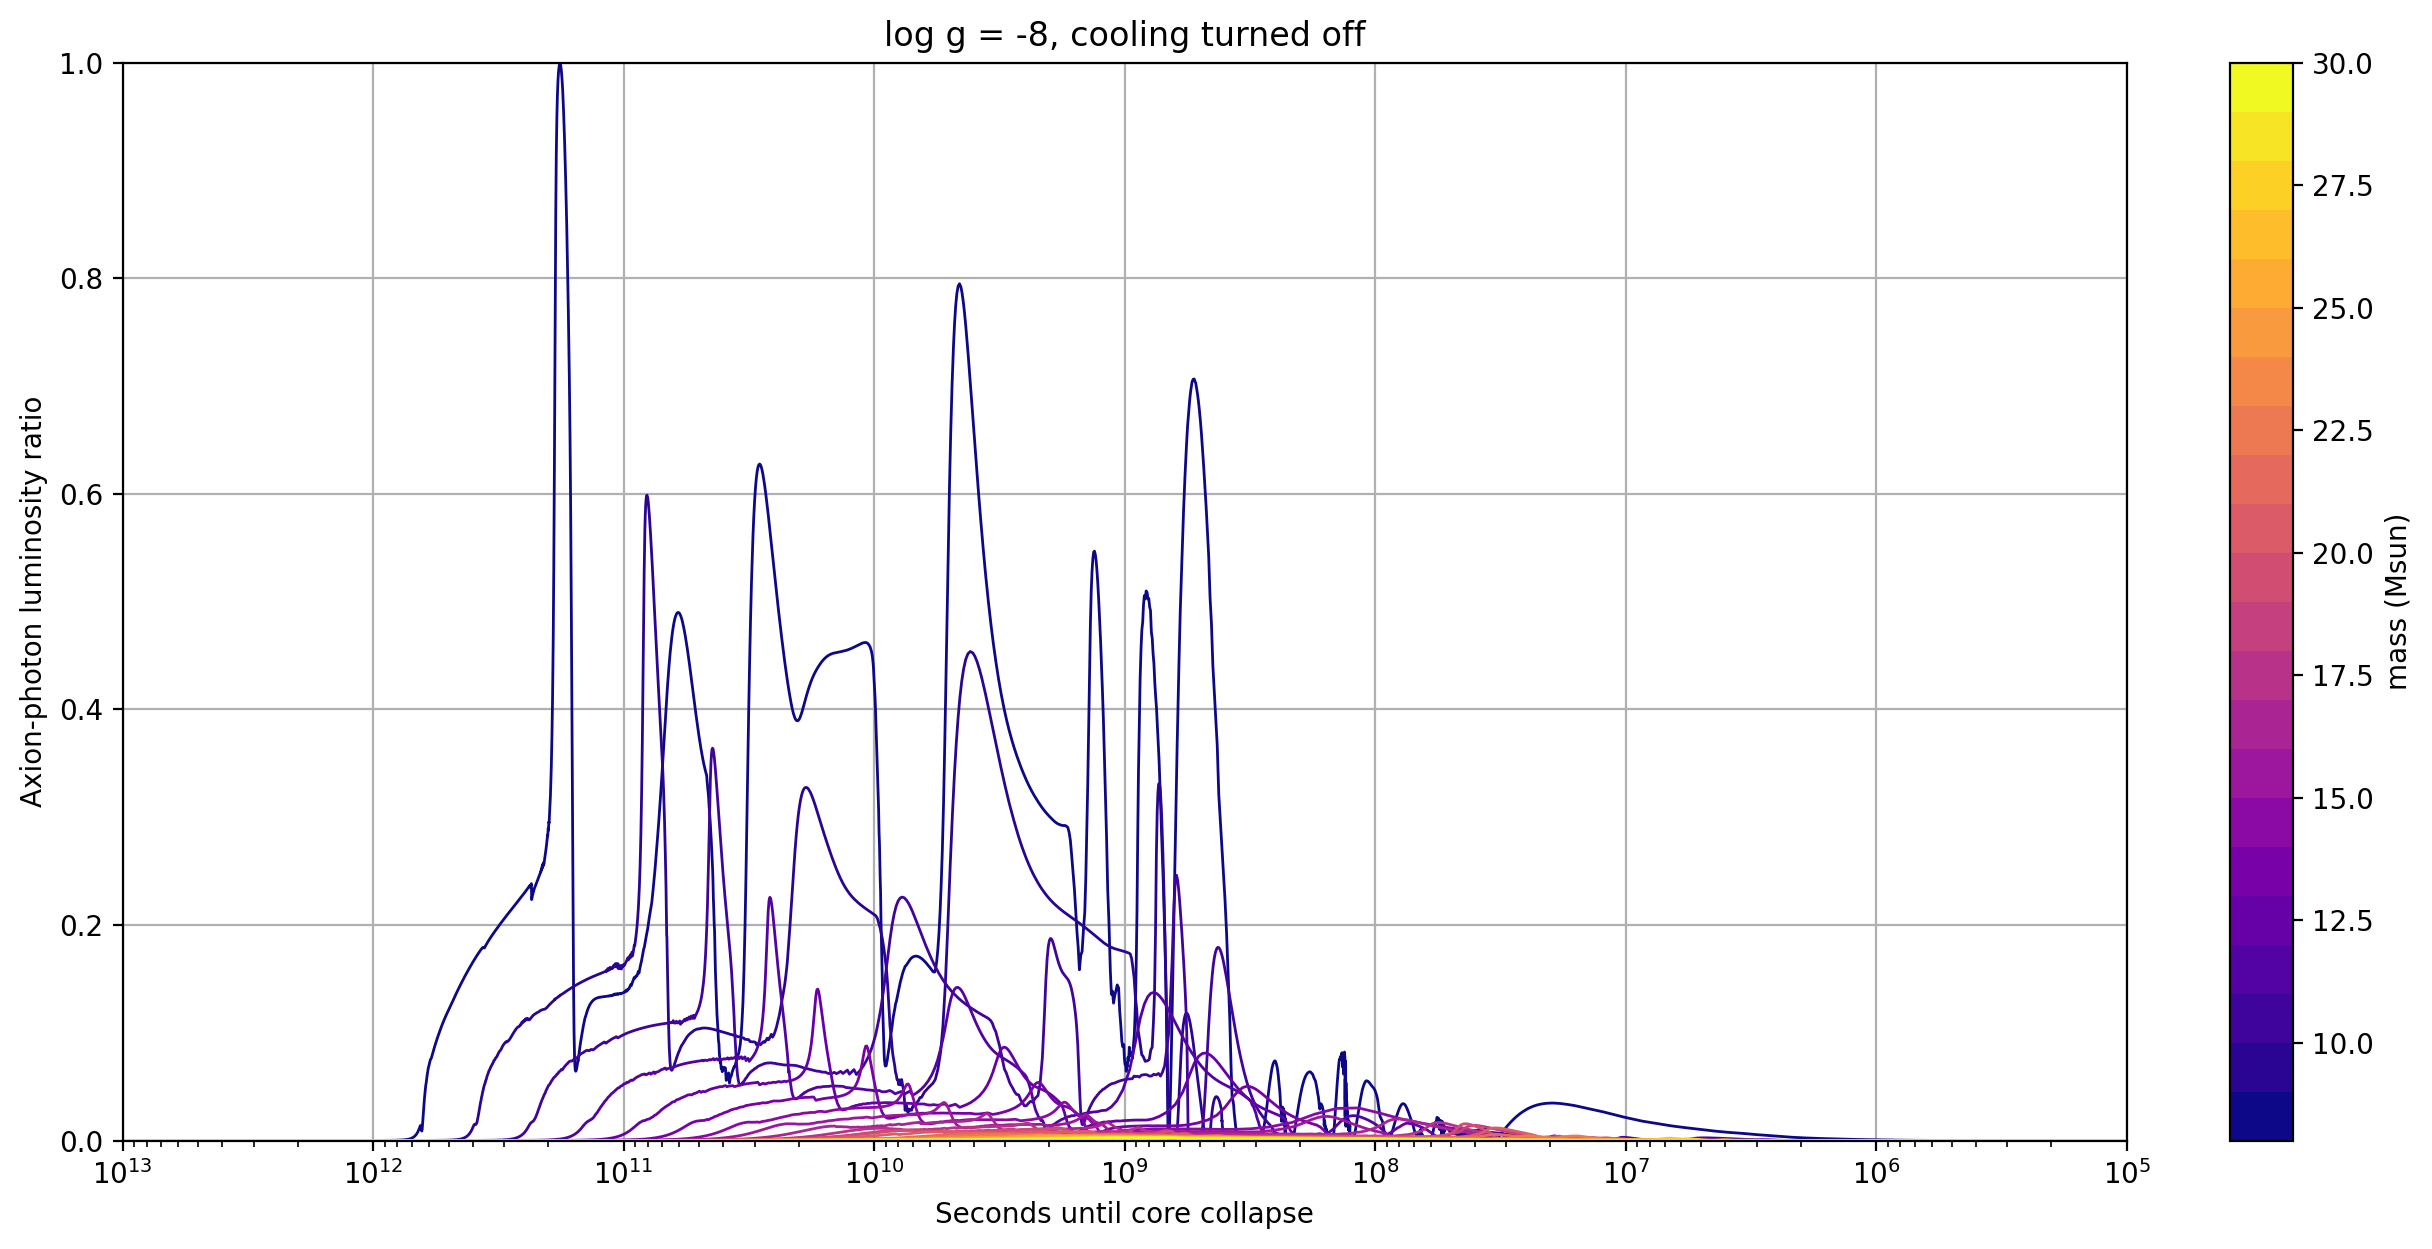

In [14]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(14, 7), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
# main_ax.set_facecolor('black')
fig.colorbar(colormap_m, label='mass (Msun)', cax=color_ax)

###

plt.sca(main_ax)
# main_ax.set_yscale('log')
main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    x = np.array(run['time to core O depletion (years)']) * 3.154e+7
    # print(key)
    y = np.array(run['surface lum_a (ergs/s)']) * 1e2
    z = np.array(run['surface lum_gamma (ergs/s)'])
    plt.plot(x, y/z, lw=1, label=key, color=colormap_m.to_rgba(mass))
    plt.plot(x, z, lw=1, ls='--', color=colormap_m.to_rgba(mass))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(0, 1)
plt.xlim(1e13, 1e5)
plt.xlabel('Seconds until core collapse')
plt.ylabel('Axion-photon luminosity ratio')
plt.grid()

plt.title('log g = -8, cooling turned off', c='black')
# plt.legend()
plt.tight_layout()
plt.show()

2.3066131648148572e+59 -6.566077460882789


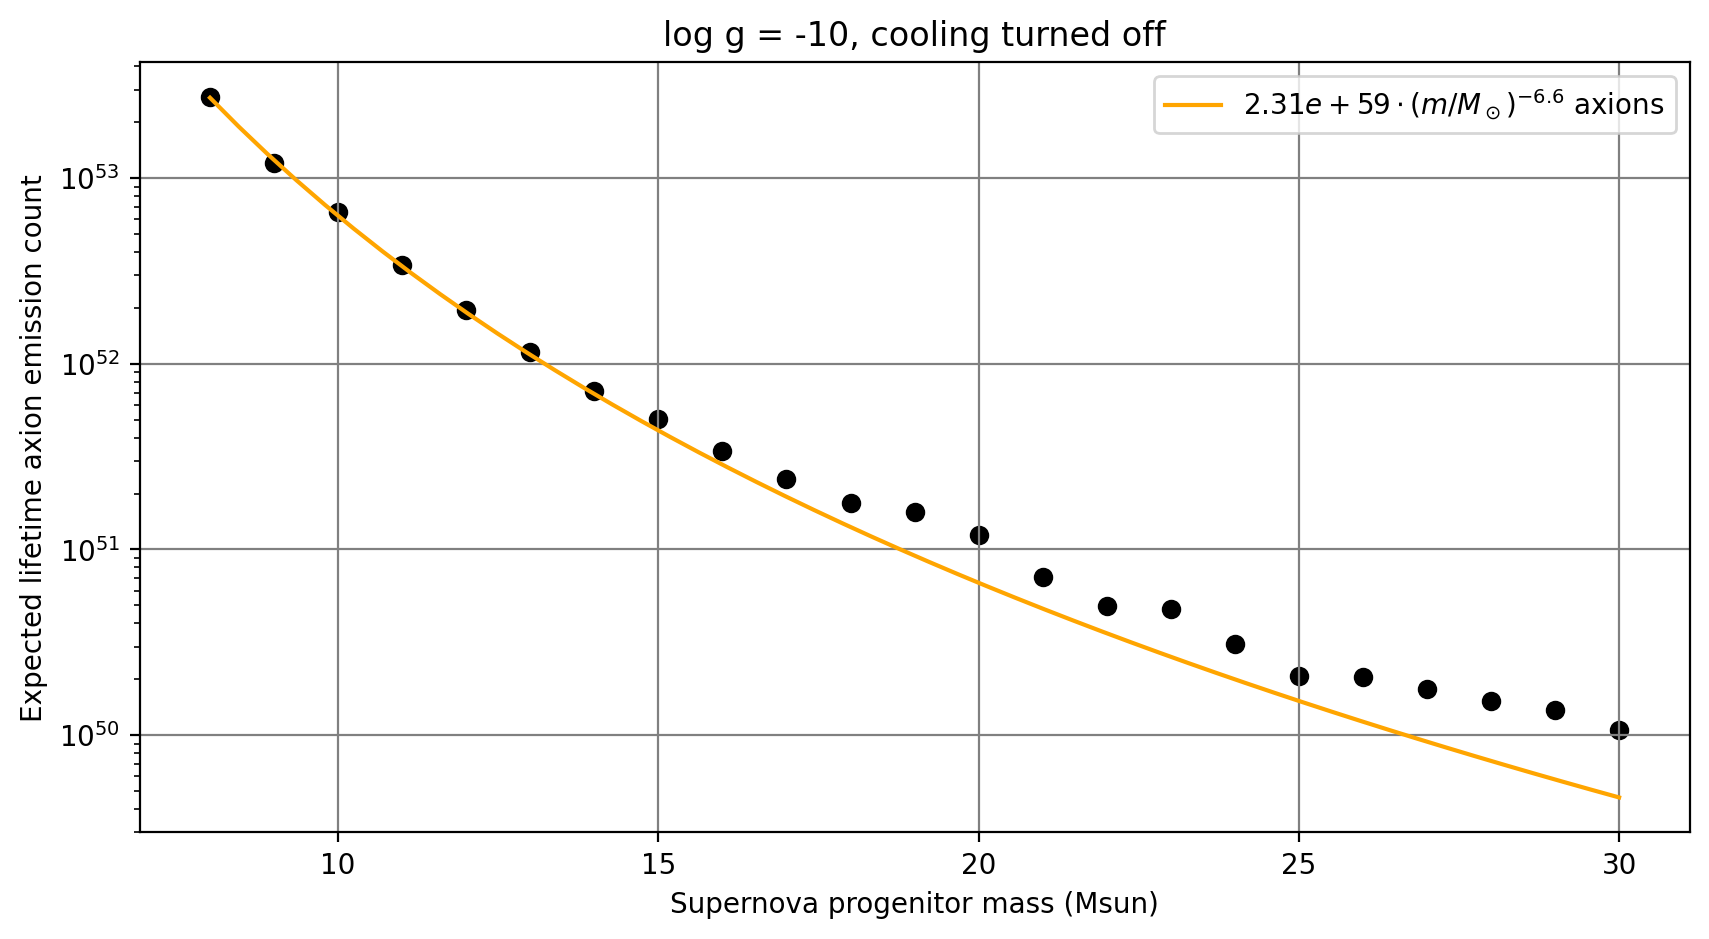

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('white')

###

ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

G = [-10]

masses = []
rates = []
for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    if g not in G: continue
    masses.append(mass)
    dt = np.array(run['dt (years)'])
    n = np.array(run['surface num_a (/s)'])
    rate = np.sum(dt * n * 3.154e+7)
    # rate = np.sum(dt * n)/np.sum(dt)
    rate *= mass**-2.35 / 0.0447191427629
    rates.append(rate)

masses = np.array(masses)
rates = np.array(rates)

from scipy.optimize import curve_fit
def expfit(x, a, b): 
    return a * (x**b)
[ a, b ], pcov = curve_fit(expfit, masses[masses<15], rates[masses<15], p0=[1e53, -1])
print(a,b)
plt.plot(np.linspace(8, 30), expfit(np.linspace(8, 30), a, b), label=f"${a:.2e}\cdot (m/M_\odot)^{{{b:.1f}}}$ axions", color='orange')
plt.scatter(masses, rates, color='black')

# plt.ylim(1e20, 1e50)
# plt.xlim(8, 25)
plt.xlabel('Supernova progenitor mass (Msun)')
plt.ylabel('Expected lifetime axion emission count')
plt.grid(color='gray')
# plt.ylim(0, 2e54)

plt.title('log g = -10, cooling turned off', c='black')
plt.legend()
# plt.show()

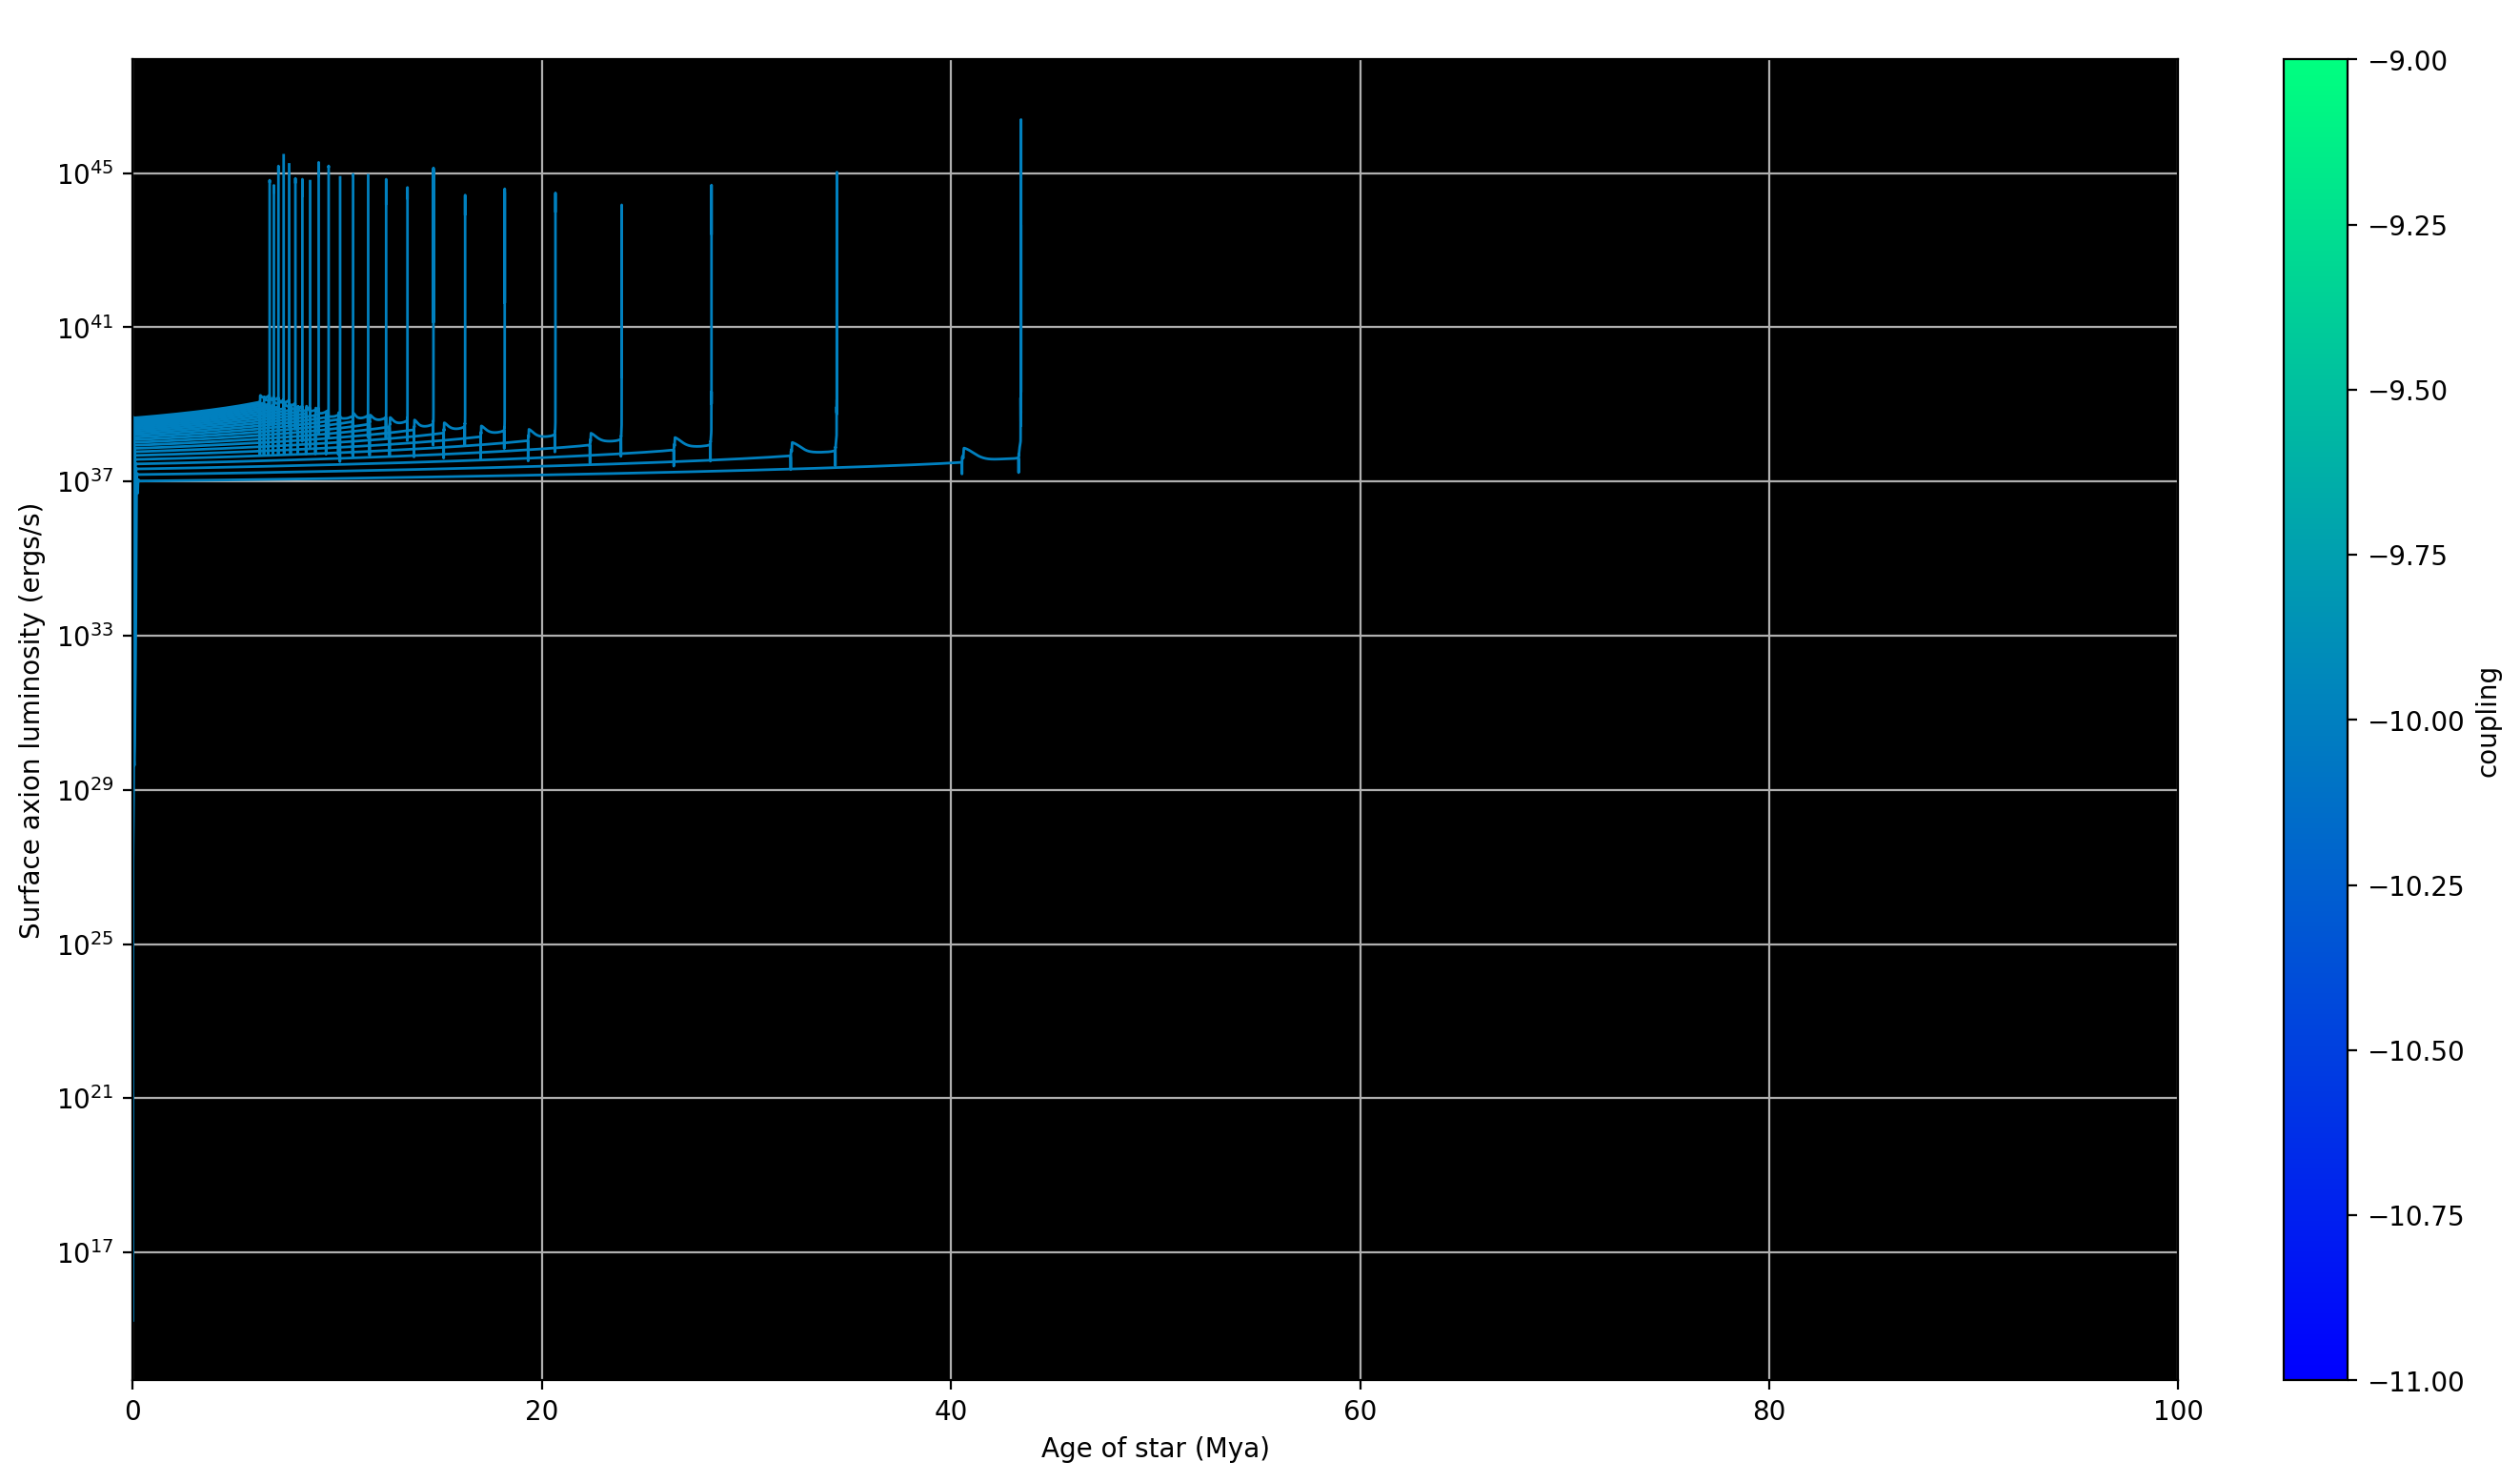

In [16]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in reversed(runs):
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_gamma (ergs/s)'])
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(2 if np.array(run['core T (K)'])[-1] < Tcut else 1), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

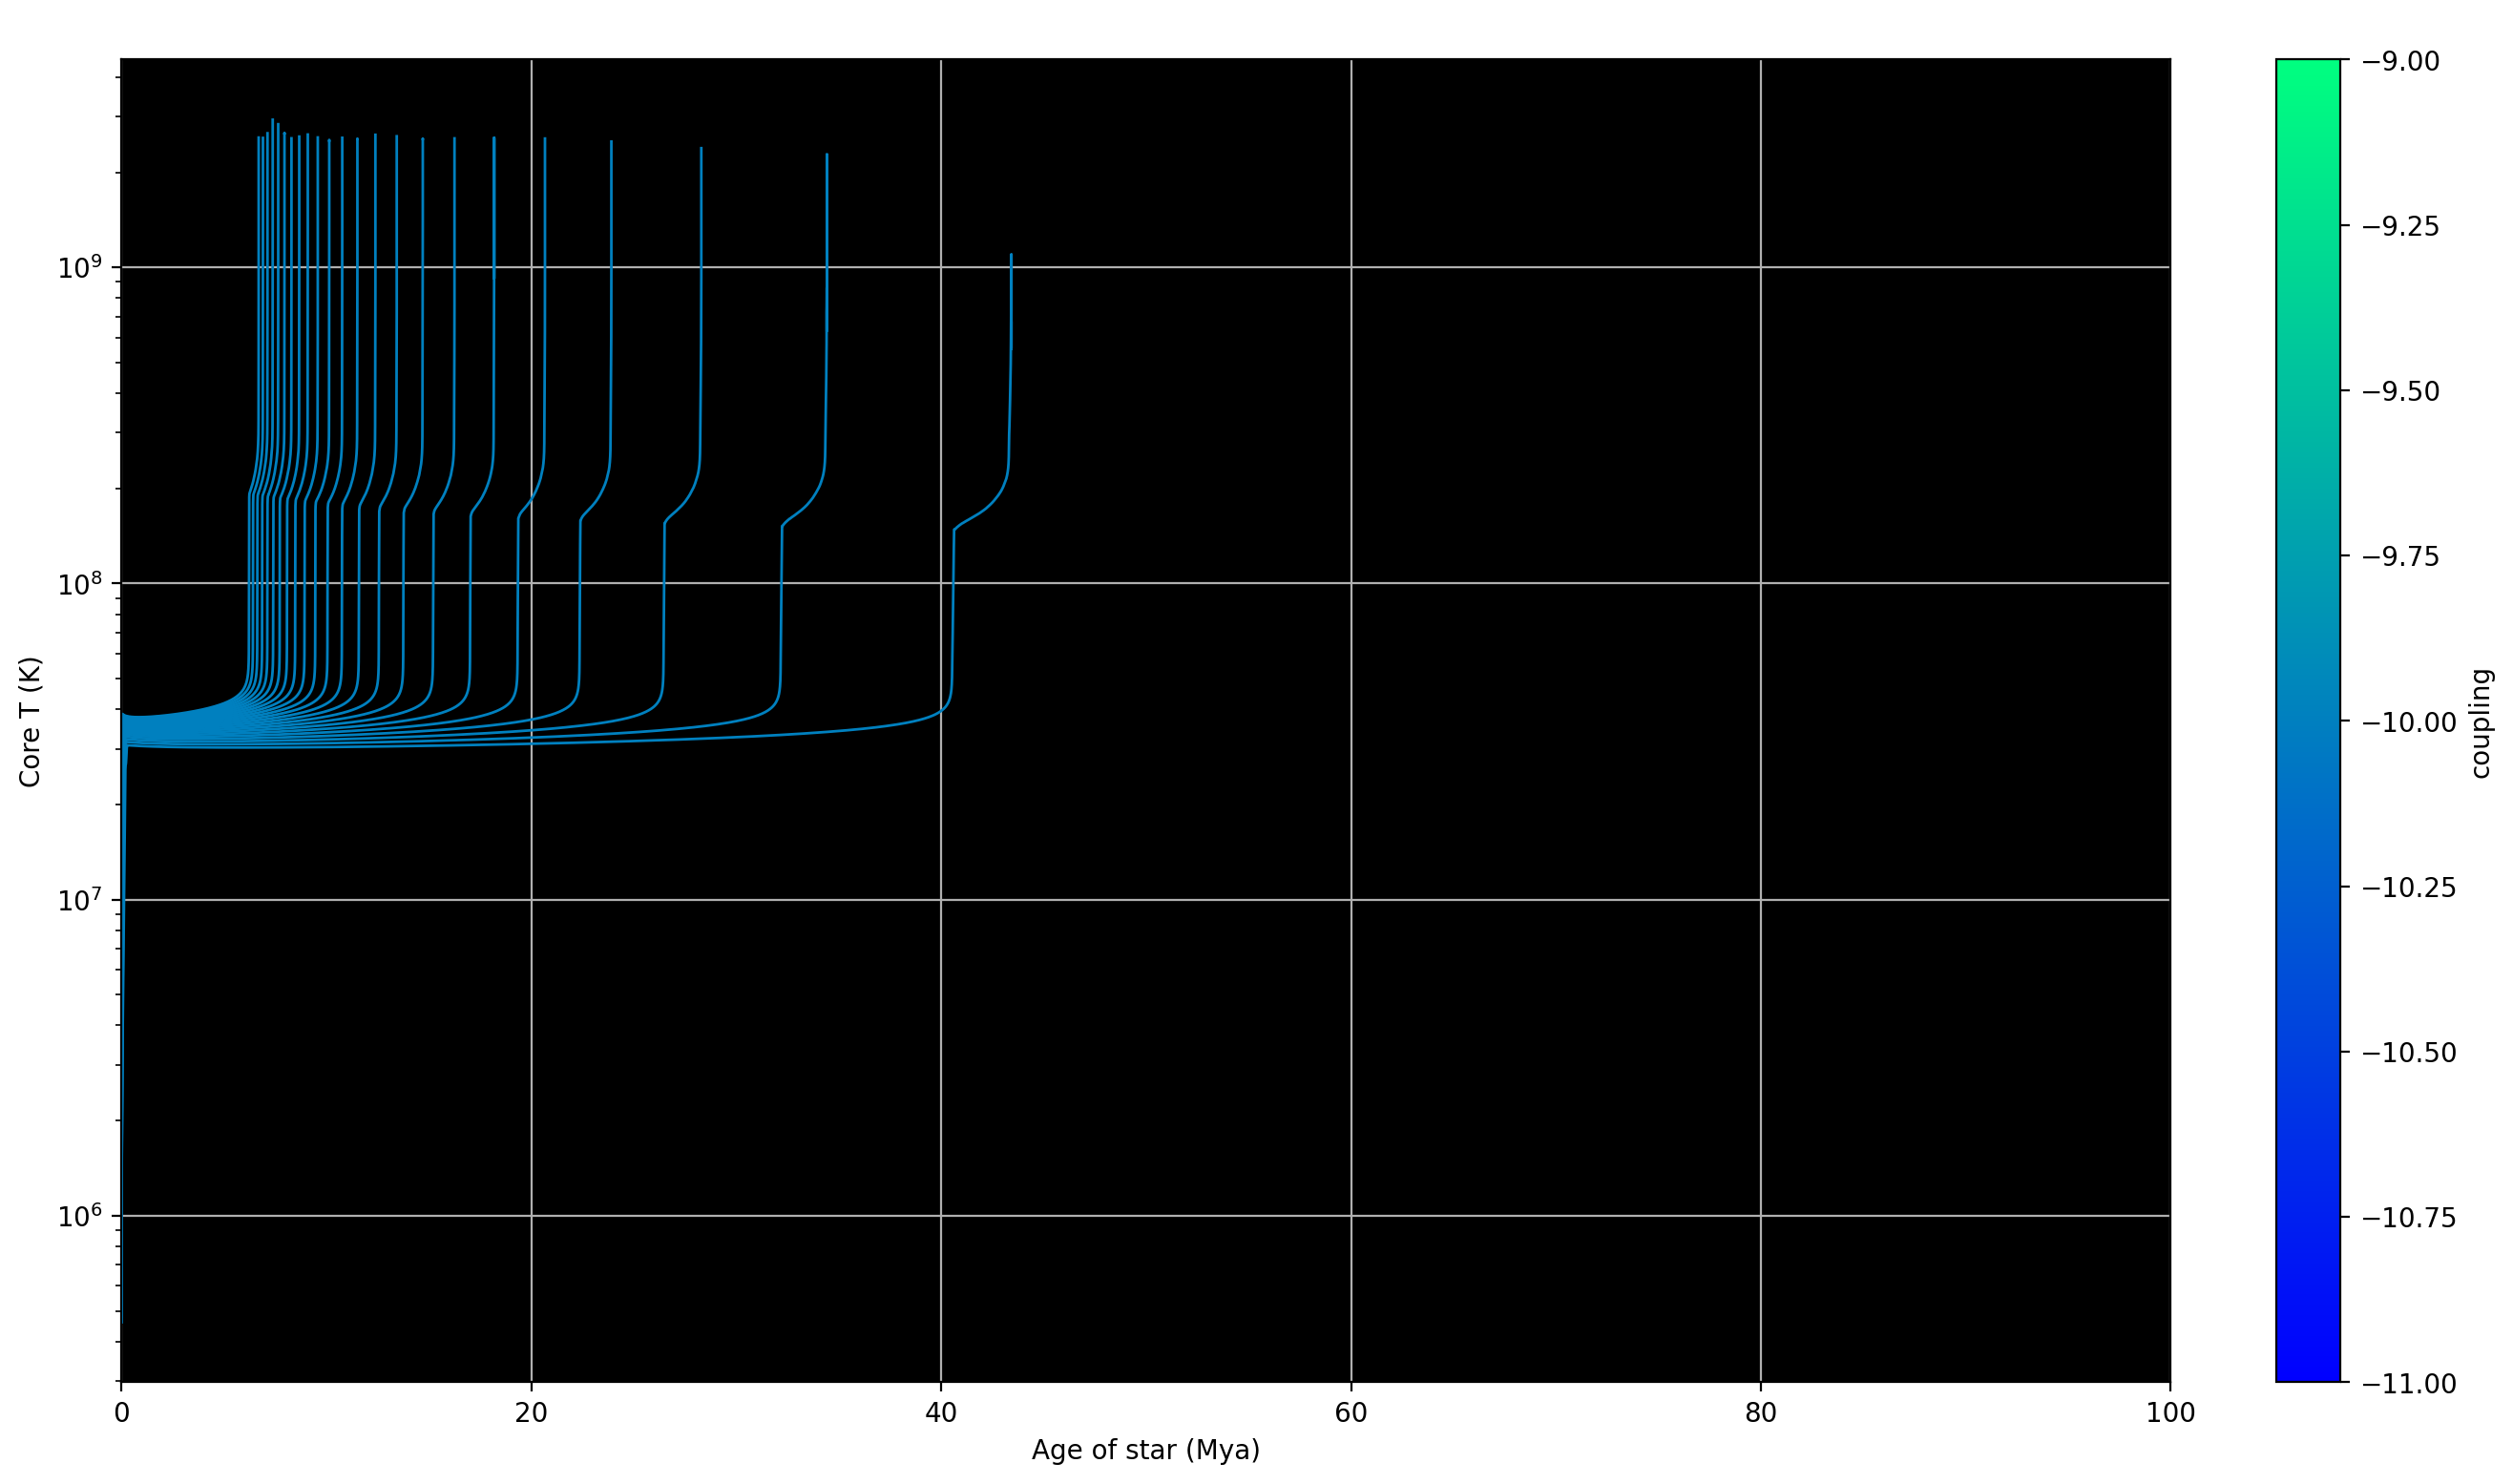

In [17]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap_g, label='coupling', cax=color_ax)
###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    g = run['coupling'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['core T (K)'])
    # plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=1, label=key, color=colormap_g.to_rgba(g))
    # plt.plot(x, y, lw=(1 if np.array(run['core T (K)'])[-1] < Tcut else 2), label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

# plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Core T (K)')
plt.grid()

plt.title('Axion emissions', c='white')
# plt.legend()
plt.show()

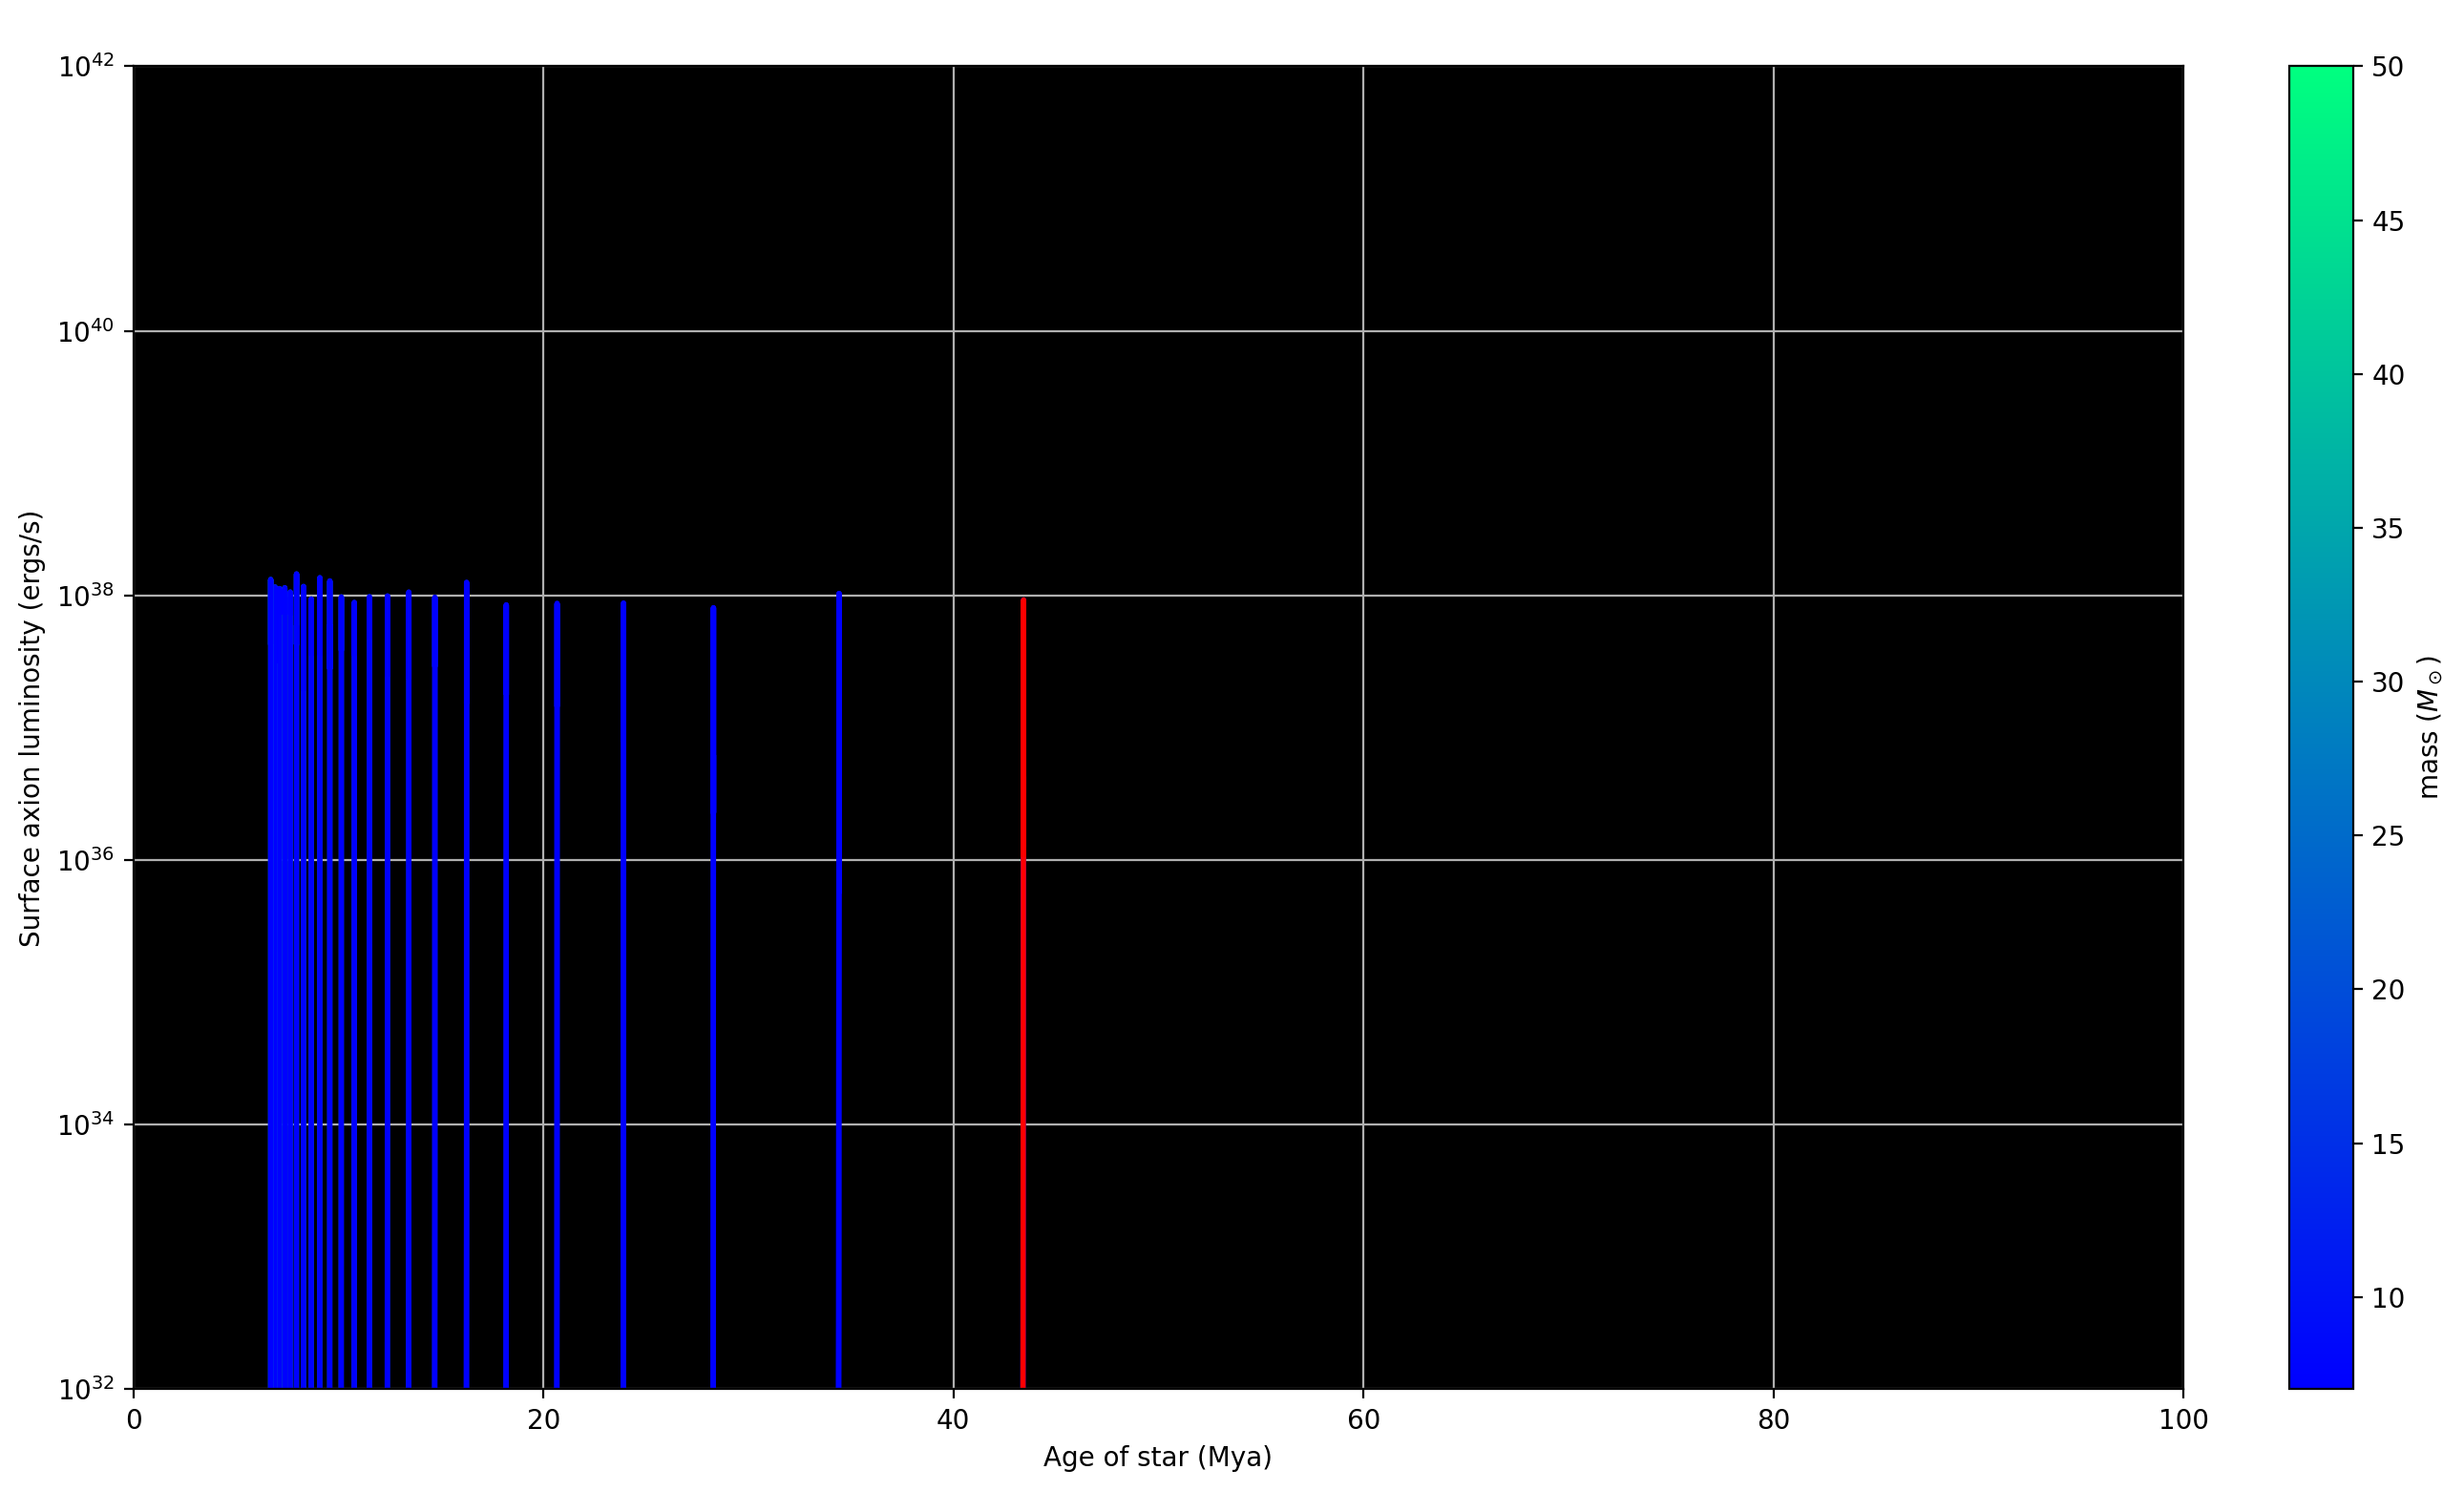

In [18]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['age (years)']) / 1e6
    y = np.array(run['surface lum_a (ergs/s)'])
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=2, label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e32, 1e42)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

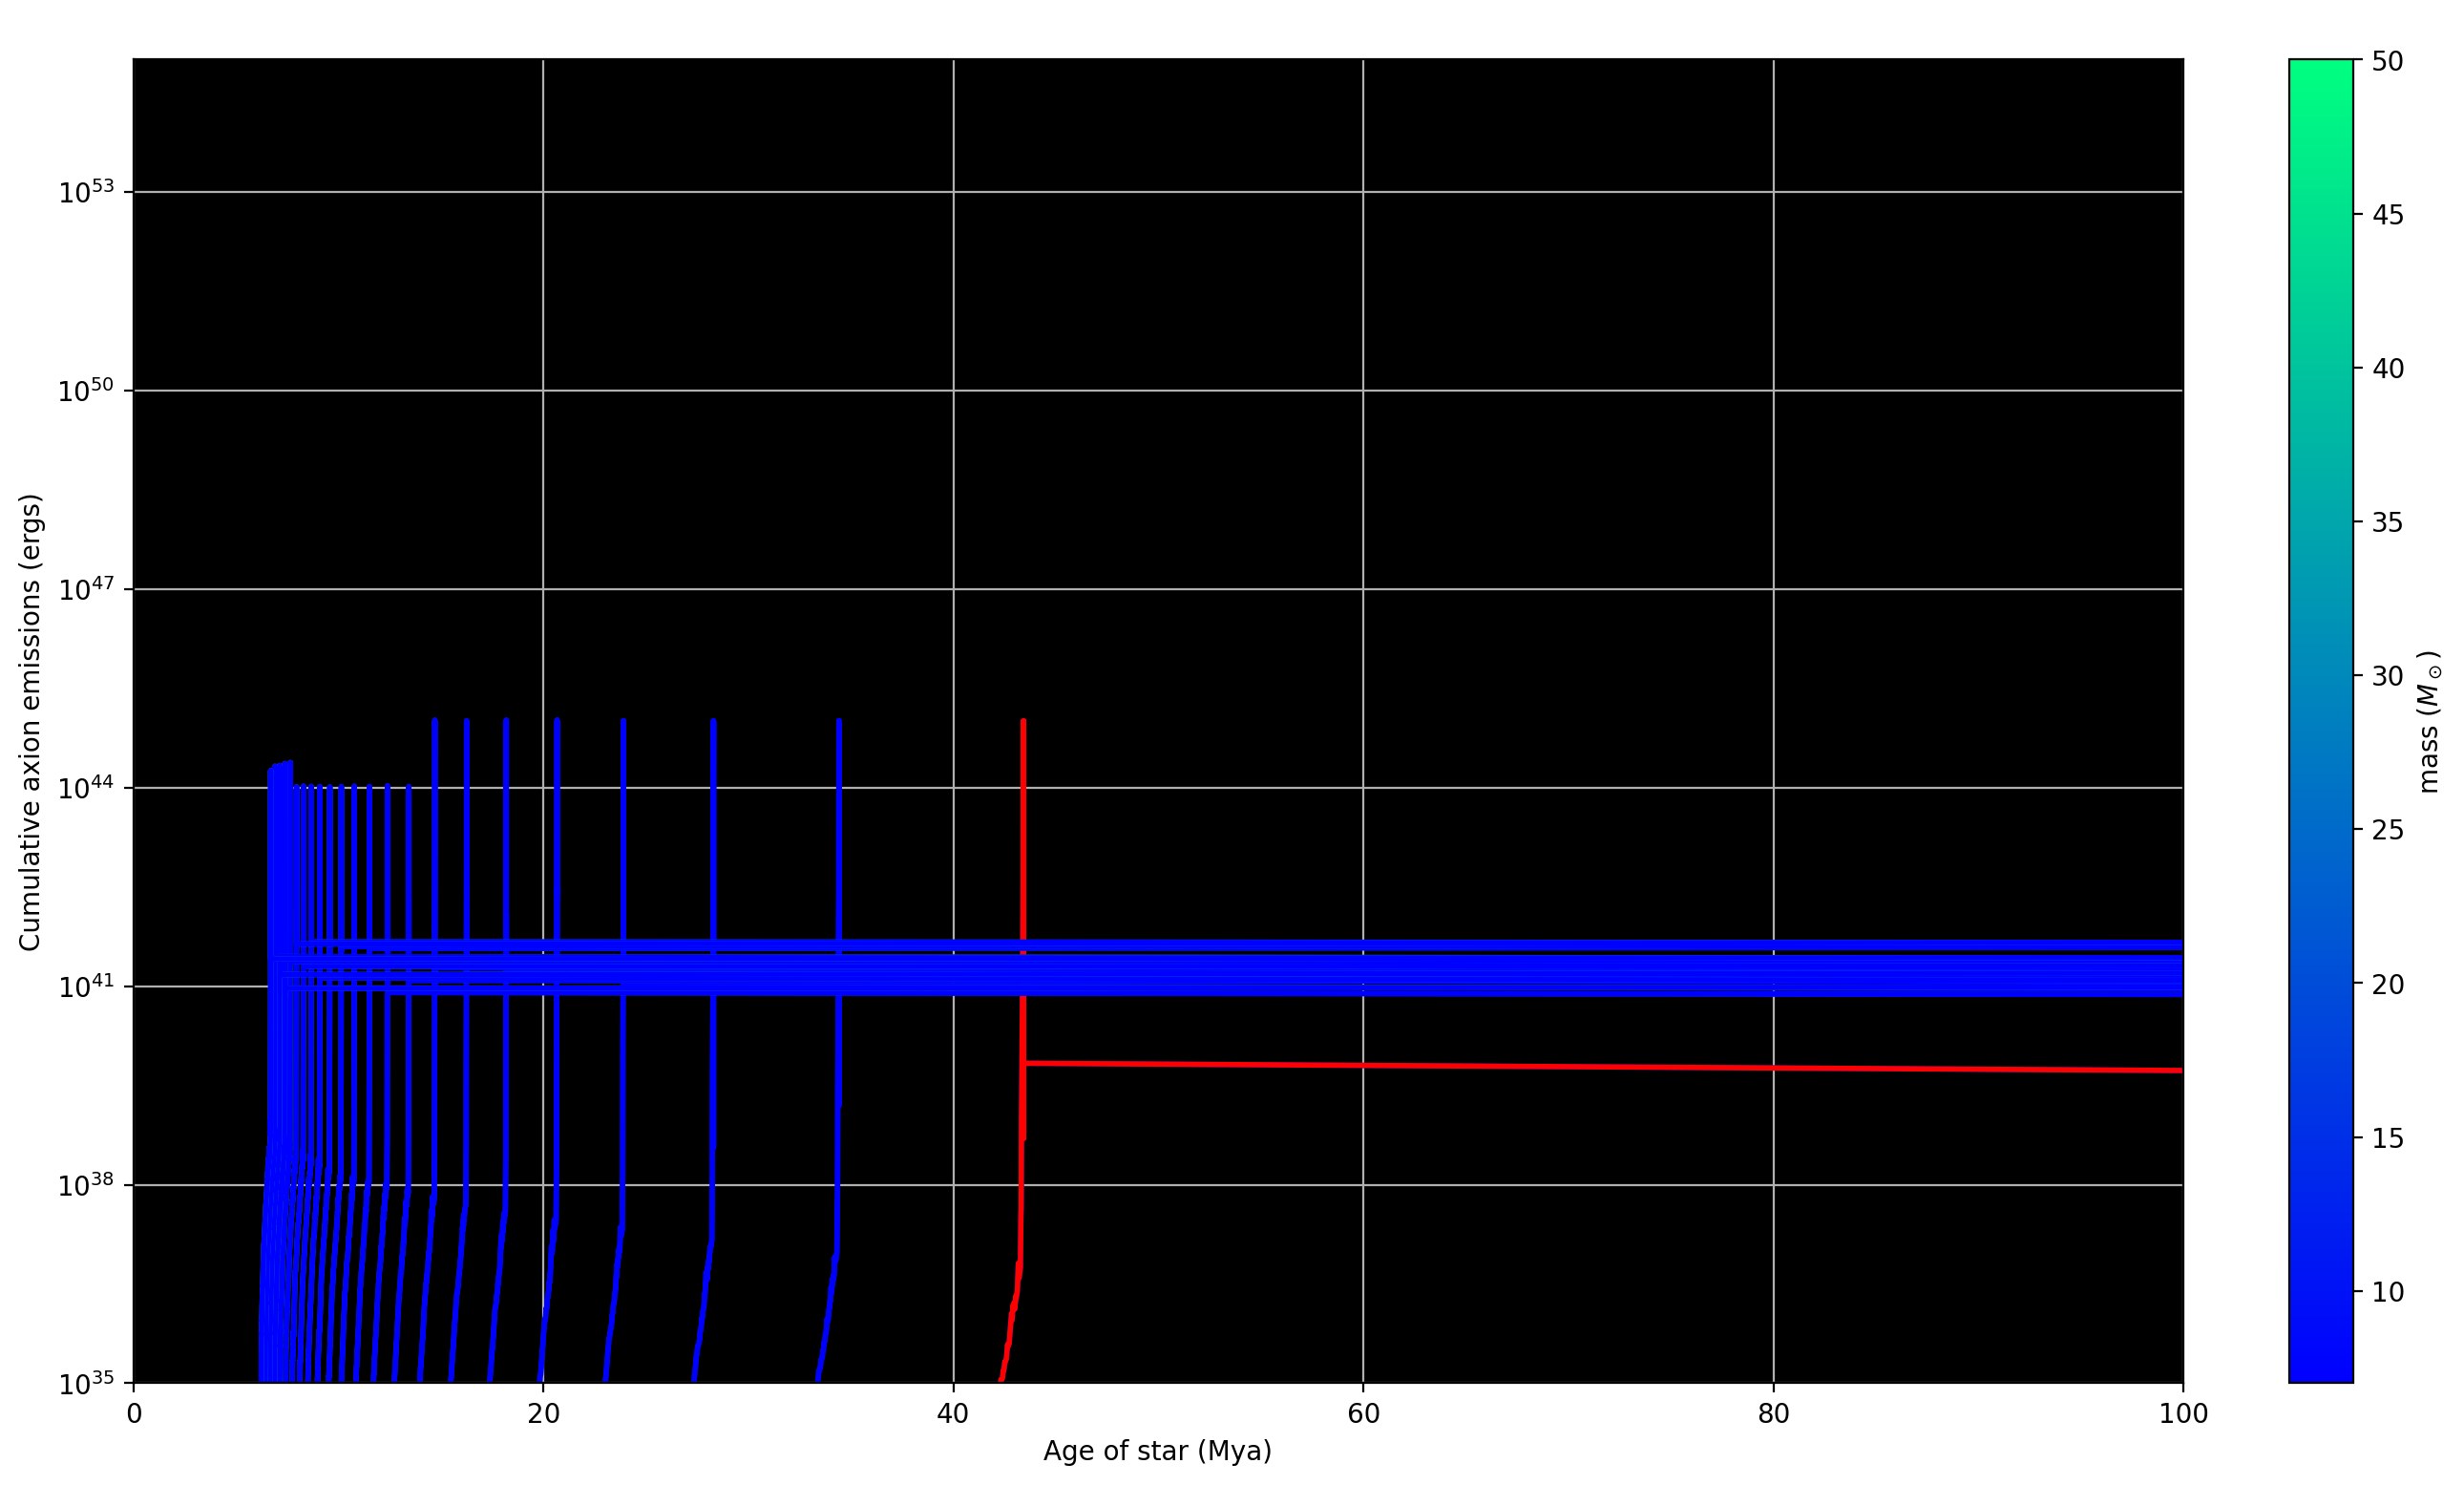

In [19]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.1 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['age (years)']) / 1e6
    x[-1] = 100
    y = np.array(run['surface lum_a (ergs/s)'] * run['dt (years)'] * 3.154e+7)
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    plt.plot(x, y, lw=2, label=key, color=('red' if np.array(run['core T (K)'])[-1] < Tcut else 'blue'))

plt.ylim(1e35, 1e55)
plt.xlim(0, 100)
plt.xlabel('Age of star (Mya)')
plt.ylabel('Cumulative axion emissions (ergs)')
plt.grid()

plt.title('Lifetime axion emissions (ergs)', c='white')
# plt.legend()
plt.show()

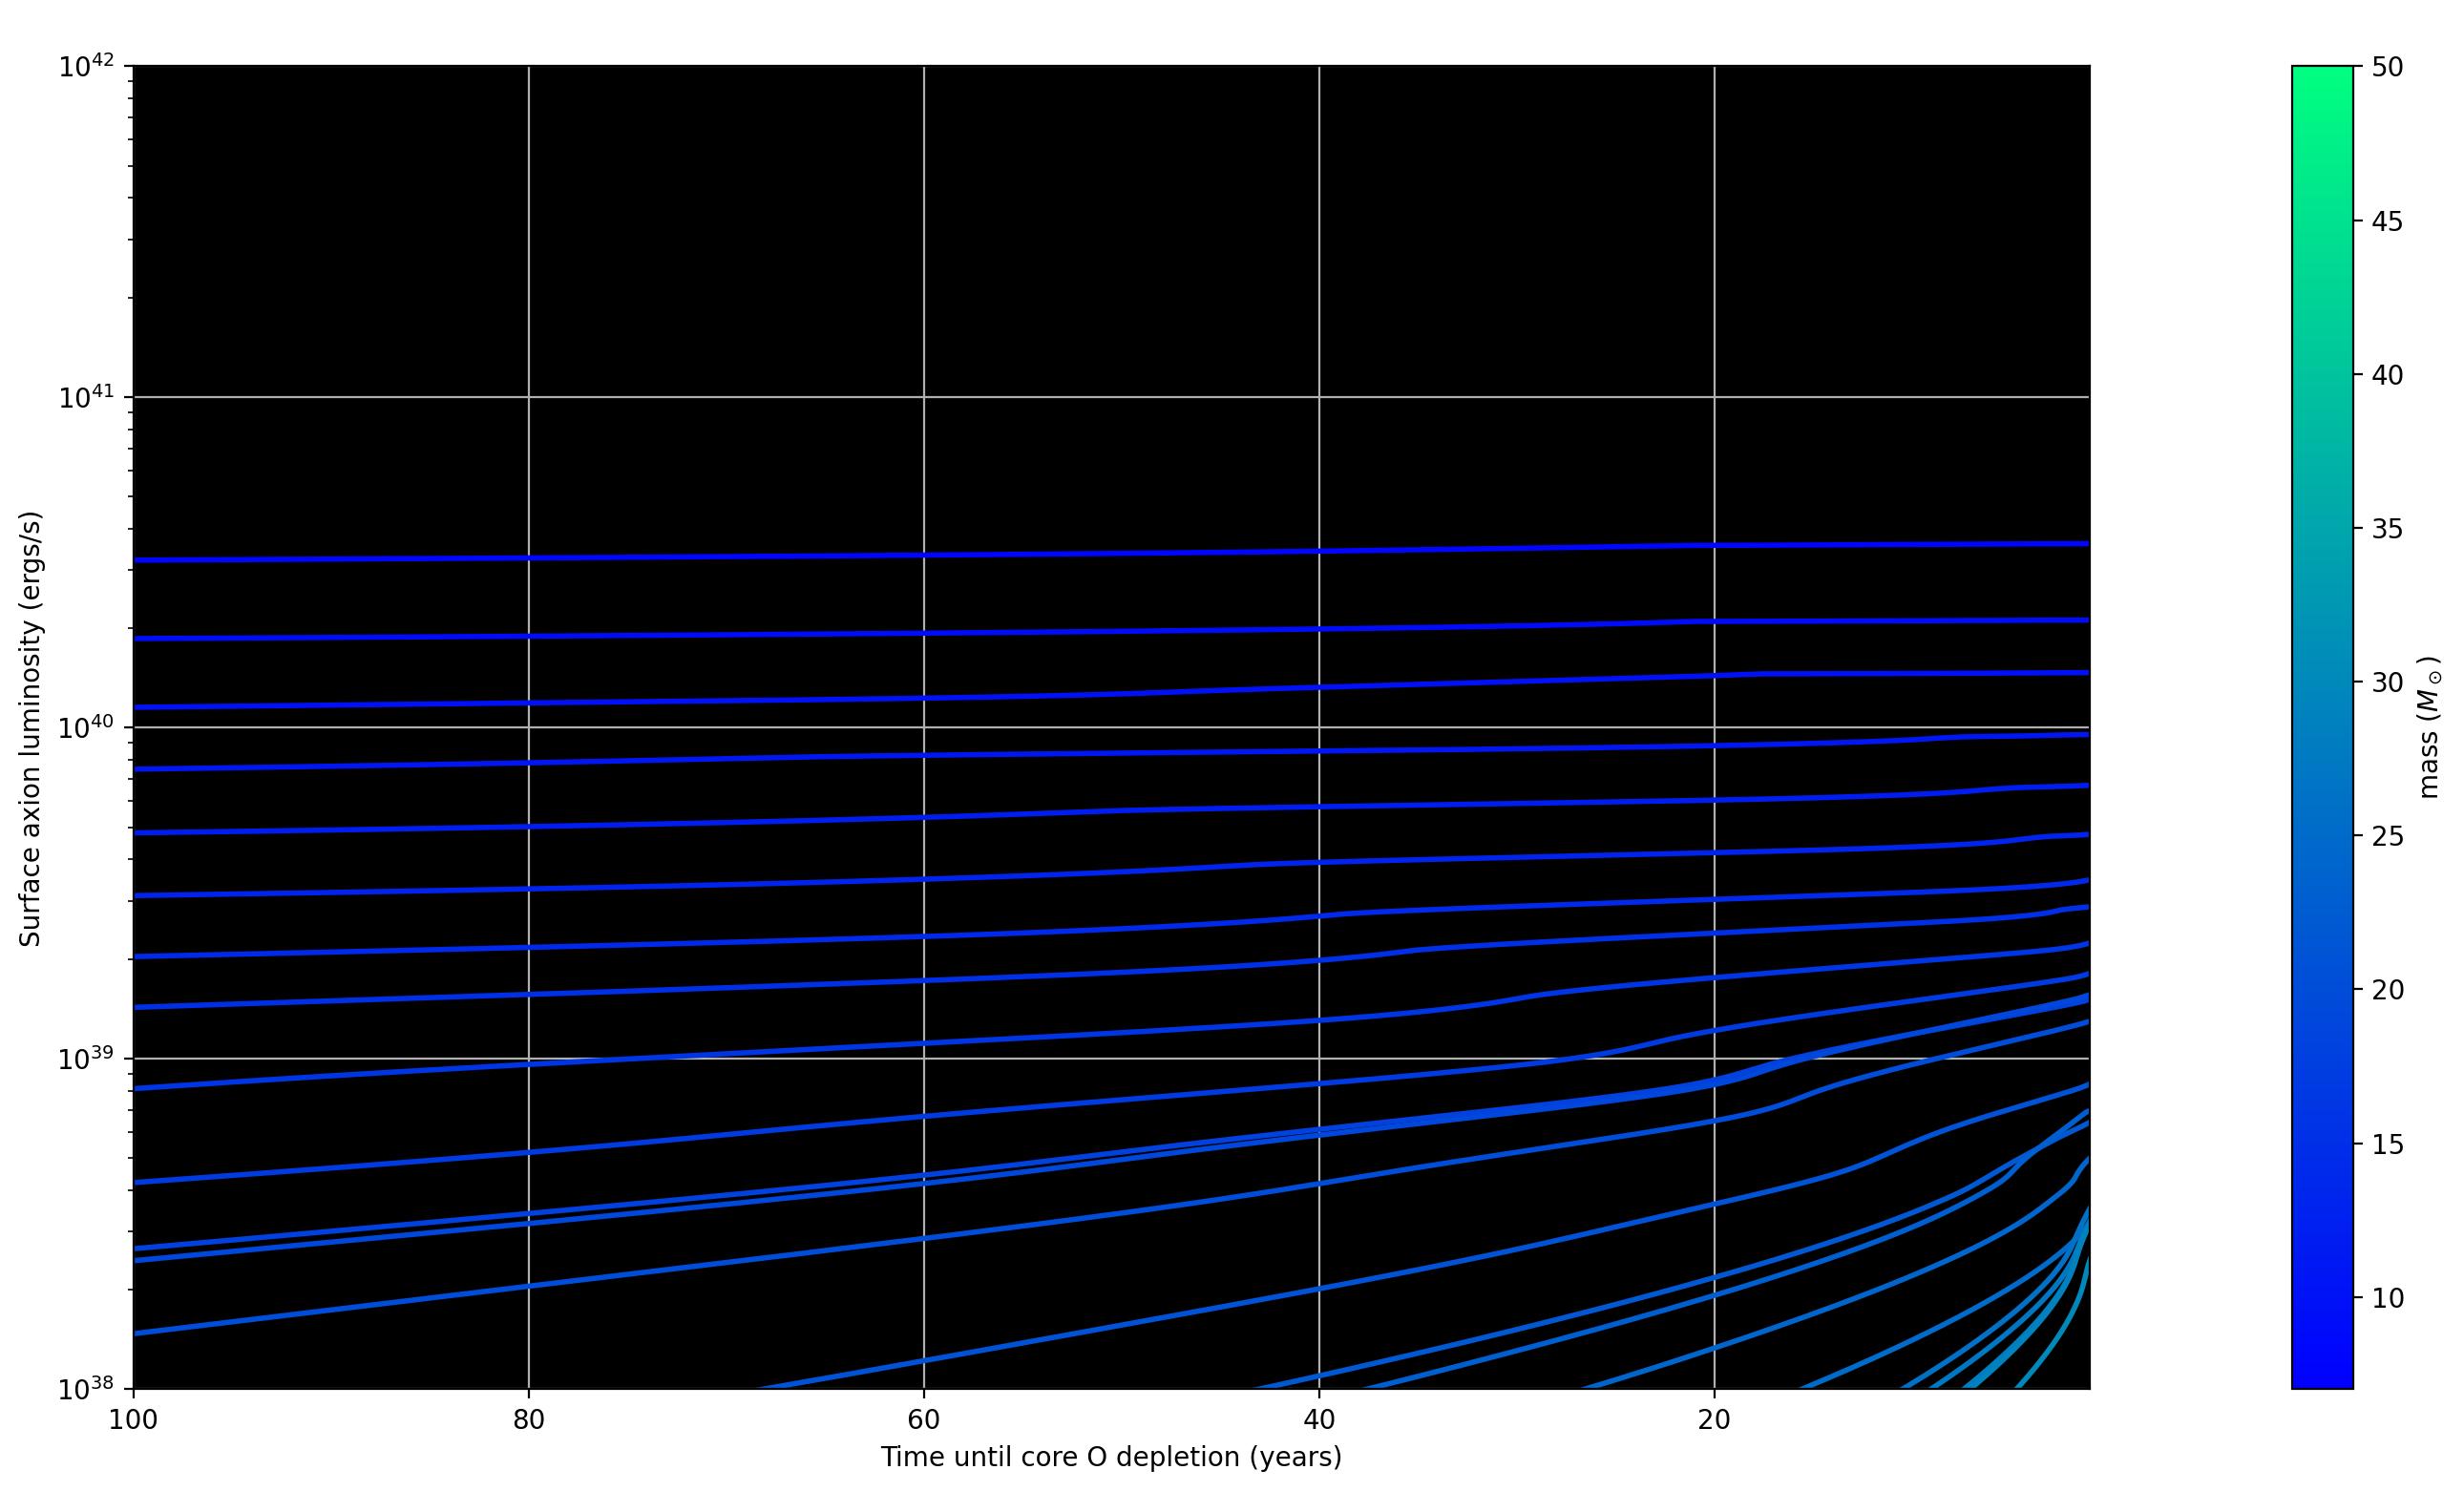

In [20]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    mass = run['mass (Msun)'][0]
    x = np.array(run['time to core O depletion (years)'])
    dt = np.array(run['dt (years)'])
    rate = np.array(run['surface lum_a (ergs/s)'])
    y = np.cumsum(rate * dt, axis=0)
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))

plt.ylim(1e38, 1e42)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Surface axion luminosity (ergs/s)')
plt.grid()

plt.title('Axion emissions at $g_{eff}=10^{-8.5}$', c='white')
# plt.legend()
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

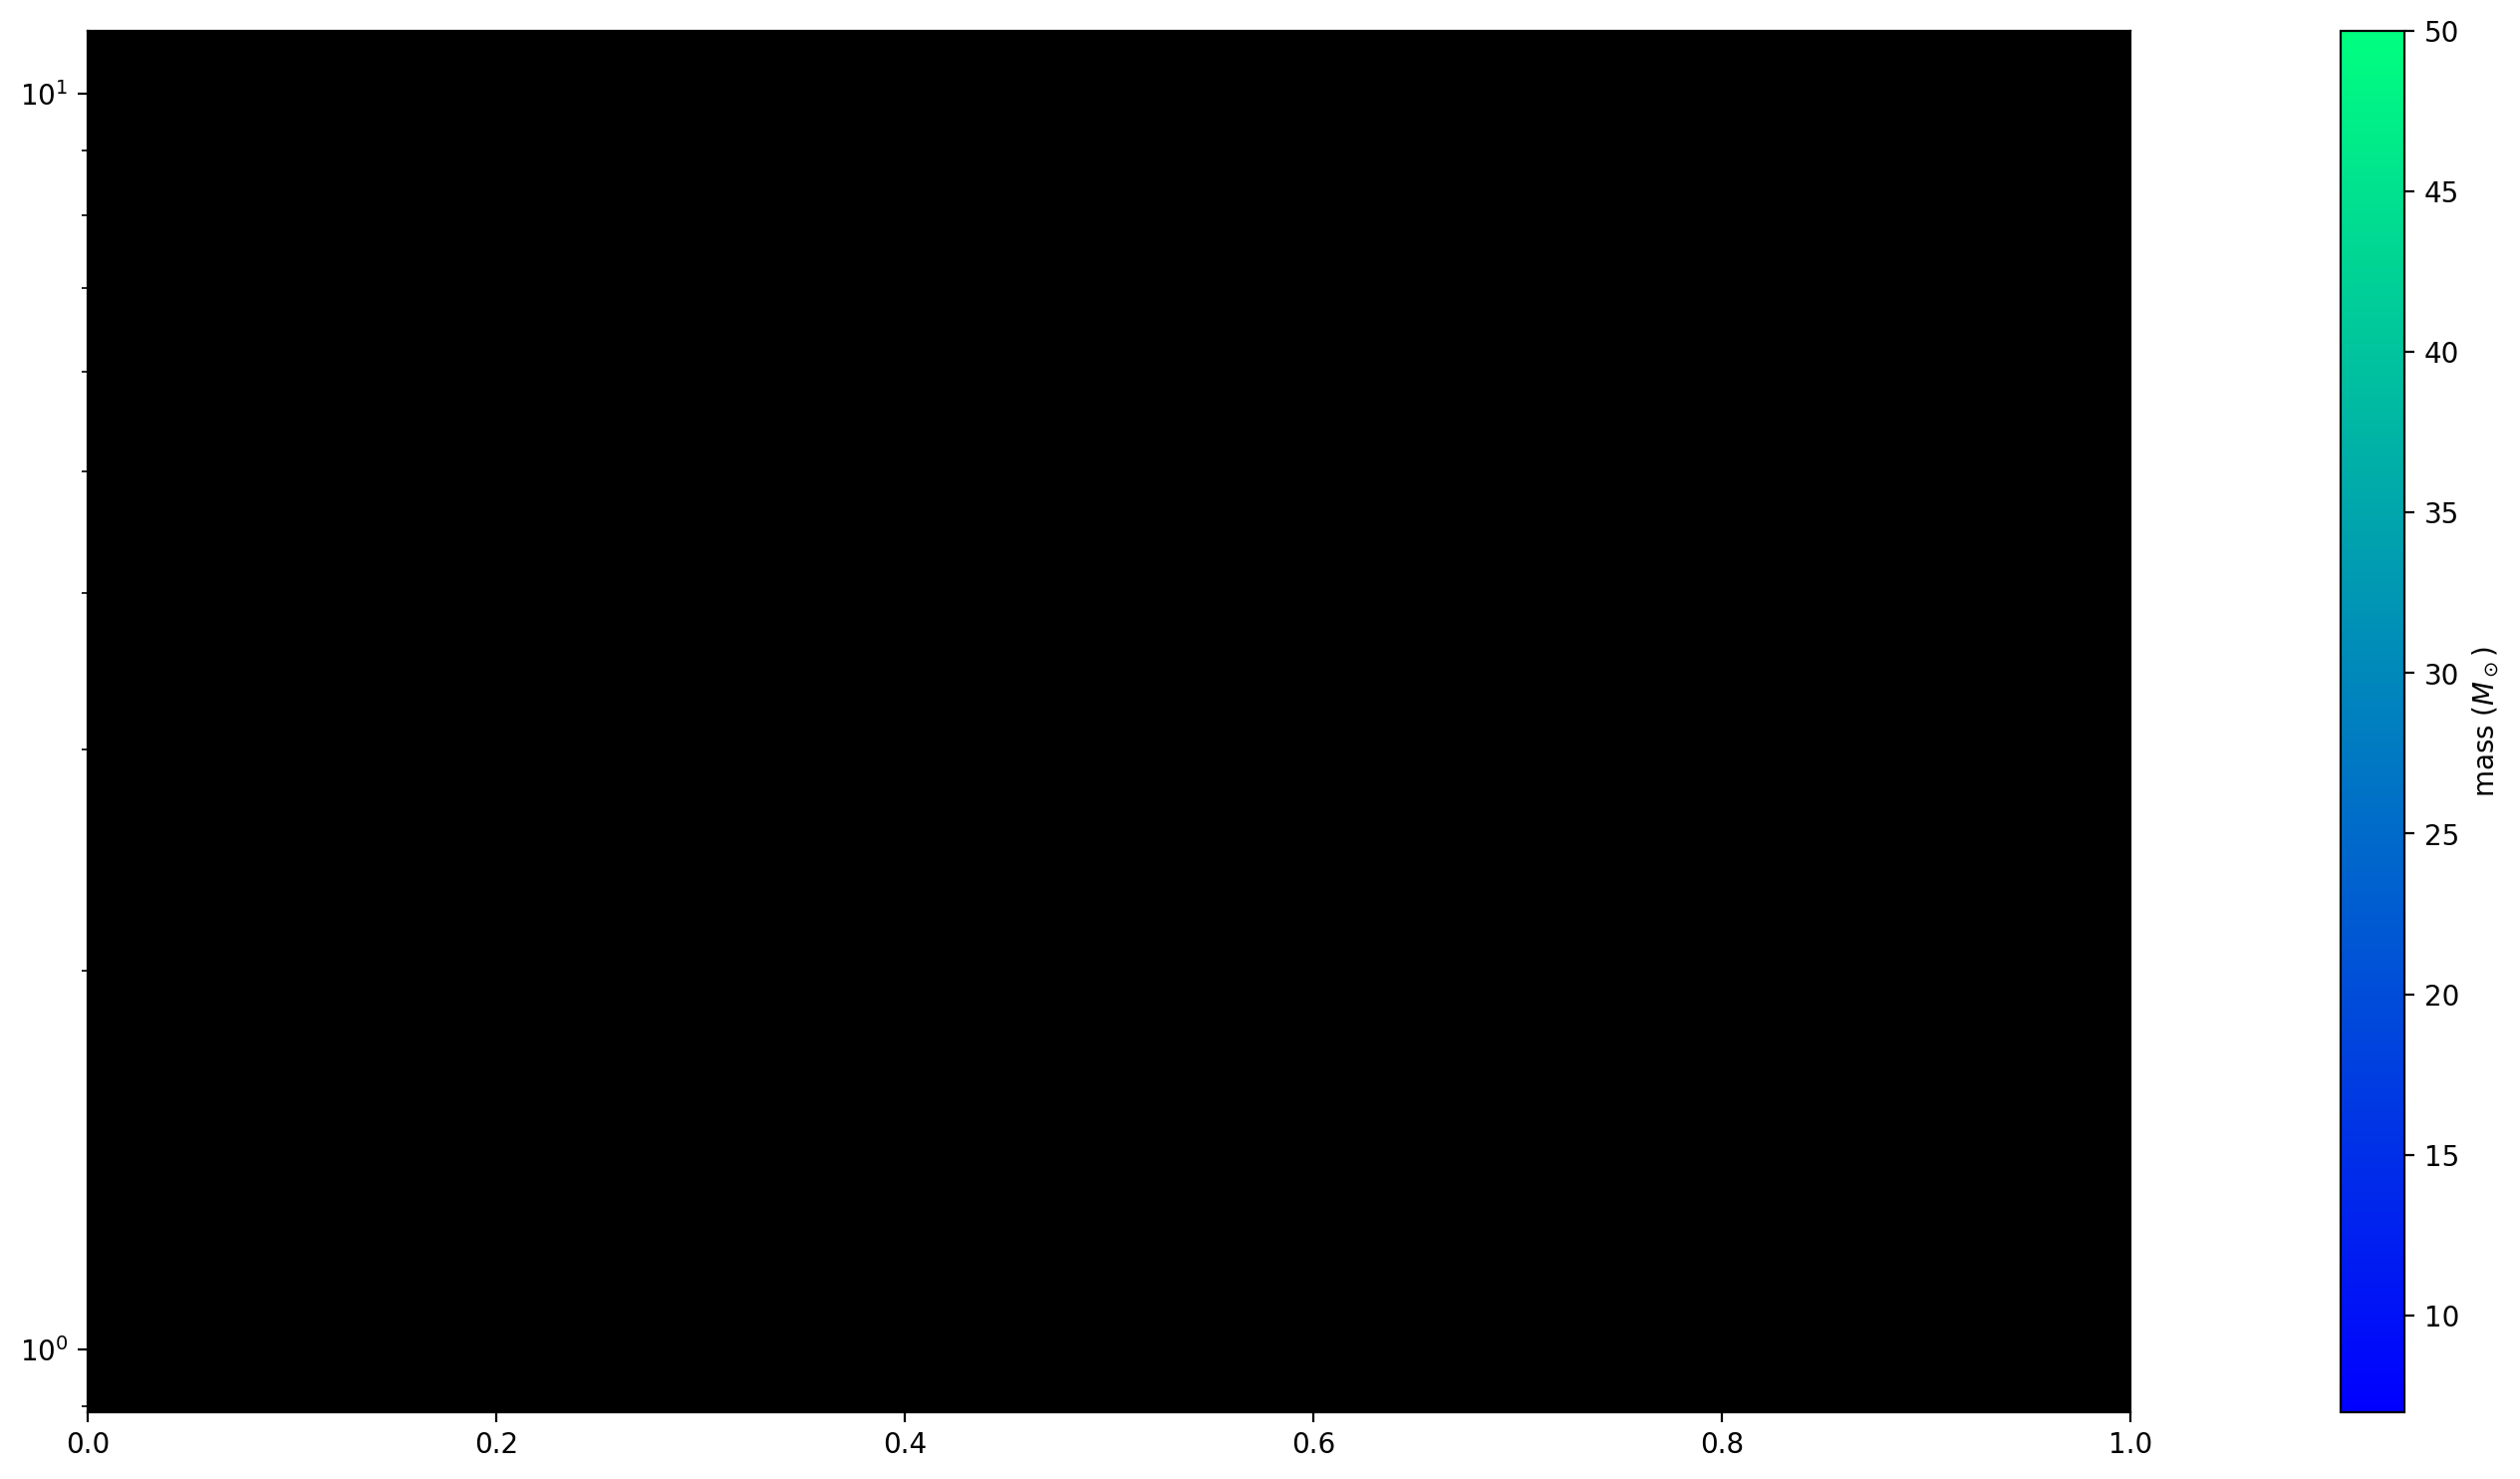

In [21]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['core T (K)']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e8, 1e10)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Core temperature (K)')
plt.grid()

plt.title('Core temperature', c='white')
plt.show()

In [ ]:
fig, (main_ax, color_ax) = plt.subplots(ncols=2, figsize=(15, 9), 
                                        gridspec_kw={'width_ratios': [32, 1], 'wspace': 0.2 }
                                       )
main_ax.set_facecolor('black')
fig.colorbar(colormap, label='mass ($M_\odot$)', cax=color_ax)

###

plt.sca(main_ax)
main_ax.set_yscale('log')
# main_ax.set_xscale('log')
# plt.ylim(1e33, 1e36)


for key in runs:
    run = runs[key]
    mass = float(key[1:3])
    x = run['time to core O depletion (years)']
    y = run['avg X_na23']
    plt.plot(x, y, lw=2, label=key, color=colormap.to_rgba(mass))
    
plt.ylim(1e-5, 1e-2)
plt.xlim(1e2, 1)
plt.xlabel('Time until core O depletion (years)')
plt.ylabel('Mass of 23Na / mass of star')
plt.grid()

plt.title('23Na mass fraction', c='white')
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['age (years)']
    y = run['core T (K)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
# plt.ylim(1e20, 1e36)
# plt.xlim(1e6, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('core T (K)')
plt.grid()
plt.legend()

In [ ]:
fig, ax = plt.subplots()

ax.set_yscale('log')
# plt.ylim(1e33, 1e36)

for key in runs:
    run = runs[key]
    x = run['time to core O depletion (years)']
    y = run['surface lum_a (ergs/s)']
    # y = run['slices']
    # print(y)
    y = np.maximum(y, 1e4)
    plt.plot(x, y, lw=1, label=key)
plt.ylim(1e30, 1e36)
plt.xlim(1e2, 0)
plt.xlabel('time to core O depletion (years)')
plt.ylabel('surface axion luminosity (ergs/s)')
plt.grid()
plt.legend()

In [ ]:
run = runs['g-7.0']
plt.plot(run['time to core O depletion (years)'], np.maximum(10, run['surface lum_a (ergs/s)']), lw=0.5)
# plt.xlim(1000, 0)

In [49]:
np.min(np.array(run['surface lum_a (ergs/s)']))

np.float64(-4.227117894505061e+36)